# Procrastinate Pro+

Предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Цель исследования:

- Выделить причины неэффективности привлечения пользователей
- ВЫявить точки роста
- Сформулировать рекомендации для отдела маркетинга

Ход исследования: <a id="soder"></a>

[1. Выгрузить данные и провести предобработку данных](#shag1)

1.1. Импорт библиотек

1.2. загрузка таблиц

1.3. Функция для просмотра содержимого таблиц

1.4. Таблица с информацией о посещениях сайта

1.4.1. Корректировка названий столбцов

1.4.2. Изменение типов данных

1.4.3. Проверка на неявные дубликаты

1.5. Таблица с информацией о зпказах

1.5.1. Корректировка названий столбцов

1.5.2. Изменение типов данных

1.6. Таблица с информацией о расхлдах на рекламу

1.6.1. Корректировка названий столбцов

1.6.2. Изменение типовданных

1.6.3. Проверка на неявные дубликаты

1.7. Вывод по разделу

[2. Задать необходимые для исследования функции](#shag3)

2.1. get_profiles() — для создания профилей пользователей

2.2. get_retention() — для подсчёта удержания

2.3. get_conversion() — для подсчёта конверсии

2.4. get_ltv() — для подсчёта пожизненной ценности клиента

2.5. filter_data() — для сглаживания данных

2.6. plot_retention() — для построения графика удержания

2.7. plot_conversion() — для построения графика конверсии

2.8  plot_ltv_roi() — для визуализации пожизненной ценности клиента и коэффициента рентабельности инвестиций

2.9. Сделать общий вывод по разделу


[3. Провести исследовательский анализ данных](#shag3)

3.1. Составить профили пользователей и определим их минимальную и максимальную даты привлечения

3.2. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны

3.3. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства

3.4. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения

3.5. Сделать общий вывод по разделу


[4. Маркетинг](#shag4)

4.1. Посчитать общую сумму расходов на маркетинг

4.2. Выяснить как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

4.3. Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику

4.4. Визуализировать динамику изменения расходов во времени по месяцам по каждому источнику

4.5. Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

4.6. Проверить, почему наблюдаются резкие скачки стоимости привлечения пользователей в TipTop

4.7. Сделать общий вывод по разделу

[5. Оцените окупаемость рекламы](#shag5)

5.1. Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

5.2. Проверить конверсию и удержание пользователей, а так же динамику их изменения

5.3. Проанализировать окупаемость рекламы с разбивкой по устройствам

5.4. Проанализировать окупаемость рекламы с разбивкой по странам

5.5. Проанализировать окупаемость рекламы с разбивкой по рекламным каналам

5.6. Проанализировать конверсию и её динамику с разбивкой по устройствам

5.7. Проанализировать конверсию и её динамику с разбивкой по странам

5.8. Проанализировать конверсию и её динамику с разбивкой по рекламным каналам

5.9. Проанализировать удержание и его динамику с разбивкой по устройствам

5.10. Проанализировать удержание и его динамику с разбивкой по странам

5.11. Проанализировать удержание и его динамику с разбивкой по рекламным каналам

5.12. Сравнить окупаемость рекламы на разных каналах в разных странах

5.13. Окупается ли реклама, направленная на привлечение пользователей в целом?

5.14. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

5.15. Чем могут быть вызваны проблемы окупаемости?

5.16. Сделать общий вывод по разделу

[6. Сделать общий вывод](#shag6)


### Загрузите данные и подготовьте их к анализу <a id="shag1"></a>  
[К содержанию](#soder)

#### Импортируем необходимые библиотеки.

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

#### Прочитаем предложенные таблицы

In [86]:
visits = pd.read_csv('/datasets/visits_info_short.csv')

In [87]:
orders = pd.read_csv('/datasets/orders_info_short.csv')

In [88]:
costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Зададим функцию для предварительного просмотра содержимого таблиц. 

In [89]:
def load(df):
        print ('Первые 20 строк таблицы:')
        print ()
        display (df.head(20))
        print ()
        print ('Иноформация о таблице:')
        print ()
        display (df.info())
        print ()
        print ('Количество дубликатов в таблице:')
        print ()
        display (df.duplicated().sum())
        print ()
        print ('Количество пропусков в таблице:')
        print ()
        display (df.isna().sum())
        print ()
        print ('Процентное соотношение пропусков к общему числу значений для каждого столбца')
        print ()
        display (pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm'))

#### Рассмотрим таблицу с информацией о посещениях сайта.

In [90]:
load(visits)

Первые 20 строк таблицы:



User Id         Region   Device         Channel        Session Start  \
0   981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1   278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2   590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3   326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4   349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5    90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6    43958116050  United States  Android         organic  2019-05-01 09:03:21   
7   185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8   446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9   100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   
10  589320347244  United States      Mac         YRabbit  2019-05-01 18:39:23   
11  370455852550  United States   iPhone         organic  2019-05-01 14:44:30   
12  141837741427  United States      Mac        FaceBoom  2019-05-01 06:20:48   
13  924308873083  United States   iPhone         organic  2019-05-01 20:03:52   
14  774938424092  United States   iPhone    MediaTornado  2019-05-01 14:01:40   
15  244878945432  United States   iPhone    MediaTornado  2019-05-01 01:59:41   
16  157877034671  United States      Mac         organic  2019-05-01 10:25:16   
17  321335574694  United States   iPhone         YRabbit  2019-05-01 09:49:32   
18  524629398969  United States      Mac         organic  2019-05-01 17:06:46   
19  136226778935  United States       PC         organic  2019-05-01 19:34:45   

            Session End  
0   2019-05-01 02:45:01  
1   2019-05-01 04:47:35  
2   2019-05-01 15:32:08  
3   2019-05-01 00:54:25  
4   2019-05-01 03:57:40  
5   2019-05-01 08:19:56  
6   2019-05-01 10:08:39  
7   2019-05-01 10:00:43  
8   2019-05-01 10:59:17  
9   2019-05-01 04:57:05  
10  2019-05-01 20:03:15  
11  2019-05-01 15:41:24  
12  2019-05-01 06:54:33  
13  2019-05-01 20:19:34  
14  2019-05-01 14:29:24  
15  2019-05-01 02:21:50  
16  2019-05-01 10:35:03  
17  2019-05-01 10:10:02  
18  2019-05-01 18:05:31  
19  2019-05-01 19:39:24


Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None


Количество дубликатов в таблице:



0


Количество пропусков в таблице:



User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


Процентное соотношение пропусков к общему числу значений для каждого столбца



В таблице содержится информация о посещениях сайта. Таблица состоит из 6 столбцов и 309901 строк.

Структура visits:

User Id — уникальный идентификатор пользователя (целочисленный тип данных),

Region — страна пользователя (объектный тип данных),

Device — тип устройства пользователя (объектный тип данных),

Channel — идентификатор источника перехода (объектный тип данных),

Session Start — дата и время начала сессии (объектный тип данных),

Session End — дата и время окончания сессии (объектный тип данных).

Названия столбцов следует привести к нижнему регистру.

Столбцы с датой и временем начала и окончания сессии необходимо привести к типу datetime.

Пропусков и явных дубликатов не обнаружено.

##### Приведем названия столбцов таблицы visits к нижнему регистру и изменим названия некотрых столбцов.

In [91]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

##### Приведём к типу datetime столбцы с датой и временем начала и окончания сессии.

In [92]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [93]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

##### Проверим столбцы Region, Device и Channel на неявные дубликаты.

In [94]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [95]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [96]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Неявных дубликатов не выявлено.

#### Рассмотрим таблицу с информацией о заказах.

In [97]:
load(orders)

Первые 20 строк таблицы:



User Id             Event Dt  Revenue
0   188246423999  2019-05-01 23:09:52     4.99
1   174361394180  2019-05-01 12:24:04     4.99
2   529610067795  2019-05-01 11:34:04     4.99
3   319939546352  2019-05-01 15:34:40     4.99
4   366000285810  2019-05-01 13:59:51     4.99
5   129100331057  2019-05-01 01:56:28     4.99
6   626807144131  2019-05-01 02:39:21     4.99
7   914062168985  2019-05-01 02:02:18     4.99
8   769669137453  2019-05-01 03:39:47     4.99
9   434198630691  2019-05-01 18:16:50     5.99
10  846285993293  2019-05-01 13:14:07     4.99
11   64474110919  2019-05-01 02:21:45     4.99
12   68752468250  2019-05-01 20:25:33     4.99
13  946239768828  2019-05-01 21:11:24     4.99
14  872148430066  2019-05-01 09:18:02     4.99
15   29144643737  2019-05-01 09:56:07     4.99
16  784328289169  2019-05-01 16:52:30     4.99
17  645547903112  2019-05-01 05:54:57     4.99
18   59058997486  2019-05-01 11:00:21     4.99
19  784885401335  2019-05-02 06:30:36     4.99


Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None


Количество дубликатов в таблице:



0


Количество пропусков в таблице:



User Id     0
Event Dt    0
Revenue     0
dtype: int64


Процентное соотношение пропусков к общему числу значений для каждого столбца



В таблице содержится информация о заказах. Таблица состоит из 3 столбцов и 340212 строк.

Структура orders:

User Id — уникальный идентификатор пользователя (целочисленный тип данных),

Event Dt — дата и время покупки (объектный тип данных),

Revenue — сумма заказа (вещественный тип данных).

Названия столбцов следует привести к нижнему регистру.

Столбец с датой и временем покупки необходимо привести к типу datetime.

Пропусков и явных дубликатов не обнаружено.

##### Приведем названия столбцов таблицы orders к нижнему регистру и изменим названия некотрых столбцов.

In [98]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

##### Приведём к типу datetime столбцы  с датой и временем покупки.

In [99]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#### Рассмотрим таблицу с информацией о расходах на рекламу.

In [100]:
load(costs)

Первые 20 строк таблицы:



dt   Channel  costs
0   2019-05-01  FaceBoom  113.3
1   2019-05-02  FaceBoom   78.1
2   2019-05-03  FaceBoom   85.8
3   2019-05-04  FaceBoom  136.4
4   2019-05-05  FaceBoom  122.1
5   2019-05-06  FaceBoom  118.8
6   2019-05-07  FaceBoom  101.2
7   2019-05-08  FaceBoom  100.1
8   2019-05-09  FaceBoom   93.5
9   2019-05-10  FaceBoom  104.5
10  2019-05-11  FaceBoom  132.0
11  2019-05-12  FaceBoom  100.1
12  2019-05-13  FaceBoom  105.6
13  2019-05-14  FaceBoom   92.4
14  2019-05-15  FaceBoom  100.1
15  2019-05-16  FaceBoom  110.0
16  2019-05-17  FaceBoom  101.2
17  2019-05-18  FaceBoom  117.7
18  2019-05-19  FaceBoom  128.7
19  2019-05-20  FaceBoom   99.0


Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None


Количество дубликатов в таблице:



0


Количество пропусков в таблице:



dt         0
Channel    0
costs      0
dtype: int64


Процентное соотношение пропусков к общему числу значений для каждого столбца



В таблице содержится информация о расходах на рекламу. Таблица состоит из 3 столбцов и 1800 строк.

Структура costs:
dt — дата проведения рекламной кампании (объектный тип данных),

Channel — идентификатор рекламного источника (объектный тип данных),

costs — расходы на эту кампанию (вещественный тип данных).

Названия столбцов следует привести к нижнему регистру.

Столбец с датой проведения рекламной кампании необходимо привести к типу datetime.

Пропусков и явных дубликатов не обнаружено.

##### Приведем названия столбцов таблицы costs к нижнему регистру.

In [101]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

##### Приведём к типу datetime столбец с датой проведения рекламной кампании.

In [102]:
costs['dt'] = pd.to_datetime(costs['dt'])

##### Проверим столбец channel на неявные дубликаты.

In [103]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

Неявных дубликатов не выявлено.

#### Общий вывод

В таблице visits содержится информация о посещениях сайта. Таблица состоит из 6 столбцов и 309901 строк.

Структура visits:

User Id — уникальный идентификатор пользователя (целочисленный тип данных),

Region — страна пользователя (объектный тип данных),

Device — тип устройства пользователя (объектный тип данных),

Channel — идентификатор источника перехода (объектный тип данных),

Session Start — дата и время начала сессии (объектный тип данных),

Session End — дата и время окончания сессии (объектный тип данных).

Названия столбцов приведены к нижнему регистру.

Столбцы с датой и временем начала и окончания сессии приведены к типу datetime.

Пропусков, явных и неявных дубликатов не обнаружено.

В таблице orders содержится информация о заказах. Таблица состоит из 3 столбцов и 340212 строк.

Структура orders:

User Id — уникальный идентификатор пользователя (целочисленный тип данных),

Event Dt — дата и время покупки (объектный тип данных),

Revenue — сумма заказа (вещественный тип данных).

Названия столбцов приведены к нижнему регистру.

Столбец с датой и временем покупки приведены к типу datetime.

Пропусков и явных дубликатов не обнаружено.

В таблице costs содержится информация о расходах на рекламу. Таблица состоит из 3 столбцов и 1800 строк.

Структура costs: dt — дата проведения рекламной кампании (объектный тип данных),

Channel — идентификатор рекламного источника (объектный тип данных),

costs — расходы на эту кампанию (вещественный тип данных).

Названия столбцов приведены к нижнему регистру.

Столбец с датой проведения рекламной кампании приведены к типу datetime.

Пропусков, явных и неявных дубликатов не обнаружено.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии. <a id="shag2"></a>  
[К содержанию](#soder)

#### Зададим функцию для создания профилей пользователей get_profiles().

In [104]:
def get_profiles(visits, 
                 orders, 
                 costs
                ):
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first'
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'])
    profiles['dt'] = profiles['first_ts'].dt.date  
    profiles['month'] = profiles['first_ts'].dt.month
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    costs['dt'] = costs['dt'].dt.date
    
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Зададим функцию для подсчёта Retention Rate get_retention().

In [105]:
def get_retention(profiles, 
                  sessions, 
                  observation_date, 
                  horizon_days, 
                  dimensions = [], 
                  ignore_horizon = False
                 ):
    
    dimensions = ['payer'] + dimensions
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) 
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   
        result = result.div(result['cohort_size'], axis = 0)                                                     
        result = result[['cohort_size'] + list(range(horizon_days))]                                             
        result['cohort_size'] = cohort_sizes                                                                     
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time

#### Зададим функцию для подсчёта конверсии get_conversion().

In [106]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

#### Зададим функцию для подсчёта LTV get_ltv().

In [107]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):
 
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, 
                            dims, 
                            horizon_days
                           ):
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        
        result = result.fillna(0).cumsum(axis=1)
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        result = result.div(result['cohort_size'], axis=0)
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        
        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(result_raw, 
                                                      dimensions, 
                                                      horizon_days
                                                     )

   
    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  
        result_in_time,  
        roi_grouped,  
        roi_in_time
    )

#### Зададим функцию для сглаживания данных filter_data().

In [108]:
def filter_data(df, 
                window
               ):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Зададим функцию для построения графика Retention Rate plot_retention().

In [109]:
def plot_retention(retention, 
                   retention_history, 
                   horizon, 
                   window=7
                  ):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
 
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    
    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']]
    
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon))

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon))
    
    plt.tight_layout()
    plt.show()

#### Зададим функцию для построения графика конверсии plot_conversion().

In [110]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    
    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Зададим функцию для визуализации LTV и ROI plot_ltv_roi.

In [111]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Общий вывод

Заданы функции для вычисления значений метрик:

- get_profiles() — для создания профилей пользователей
- get_retention() — для подсчёта Retention Rate
- get_conversion() — для подсчёта конверсии
- get_ltv() — для подсчёта LTV

А также функции для построения графиков:

- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

### Исследовательский анализ данных <a id="shag3"></a>  
[К содержанию](#soder)

#### Составим профили пользователей и определим  их минимальную и максимальную даты привлечения.

In [112]:
profiles = get_profiles(visits, orders, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt  month  week  payer  acquisition_cost  
0       2019-05-07      5    19   True          1.088172  
1       2019-07-09      7    28  False          1.107237  
2       2019-10-01     10    40  False          0.000000  
3       2019-08-22      8    34  False          0.988235  
4       2019-10-02     10    40  False          0.230769  
...            ...    ...   ...    ...               ...  
150003  2019-09-28      9    39  False          3.500000  
150004  2019-10-21     10    43  False          0.000000  
150005  2019-07-23      7    30  False          2.600000  
150006  2019-09-28      9    39  False          0.205714  
150007  2019-10-18     10    42  False          0.000000  

[150008 rows x 10 columns]

In [113]:
min_attraction_date = profiles['dt'].min()
max_attraction_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователей:', min_attraction_date)
print('Максимальная дата привлечения пользователей:', max_attraction_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Вывод:

В таблице profiles содержится информация о 150 008 профилей пользователей, с датами первого посещения сайта, страной, каналом и устройством входа, в последных столбцах выведен месяц первого вхада, информация о том, покупал ли пользователь что-либо в течение исследуемого периода и расходы на привлечение пользователя. 

Минимальная дата привлечения пользователей: 2019-05-01. 

Максимальная дата привлечения пользователей: 2019-10-27.

Они соответствуют границе исследуемого периода.

#### Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [114]:
payers_by_region = (
    profiles.groupby(
    'region').agg(
    {'user_id' : 'nunique', 
     'payer' : 'sum'}
).merge((
    (profiles.groupby(
        'region').agg(
        {'payer' : 'mean'})*100)
    ),
    on = 'region', 
    how='left')
).rename(
    columns={
        'user_id' : 'users_count', 
        'payer_x' : 'payers_count', 
        'payer_y' : 'payers_pers'}
).sort_values(
    by='payers_pers', 
    ascending=False)

payers_by_region.round(2)

users_count  payers_count  payers_pers
region                                               
United States       100002          6902         6.90
Germany              14981           616         4.11
UK                   17575           700         3.98
France               17450           663         3.80

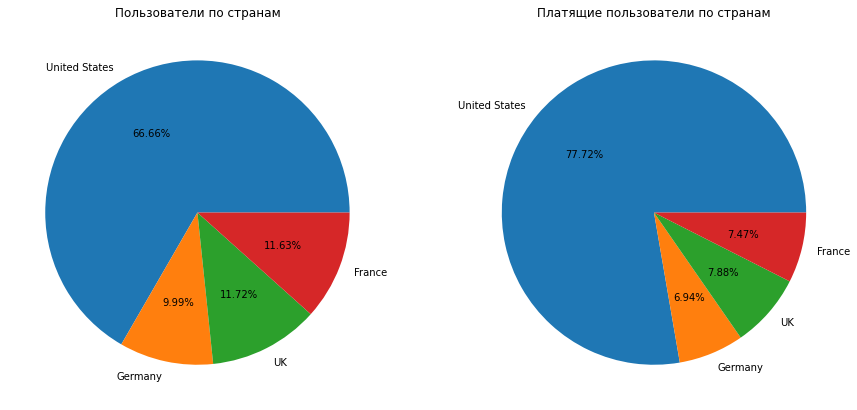

In [115]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
payers_by_region.plot(kind='pie',
                      y = 'users_count',
                      subplots=True,  
                      autopct ='%1.2f%%', 
                      legend=False,
                      ylabel='',
                      ax=ax1)
plt.title('Пользователи по странам')

ax2 = plt.subplot(1, 2, 2)
payers_by_region.plot(kind='pie',
                     y = 'payers_count',
                     subplots=True,  
                     autopct ='%1.2f%%', 
                     legend=False, 
                     ylabel='',
                     ax=ax2)
plt.title('Платящие пользователи по странам')

plt.show()

Вывод:

Больше всего зарегистрированных пользователей приходится на США, далее Франция, Англия и Германия.

Процент платящих пользователей больше всего также в США.

Отношение платящих пользователей к их общему количеству больше всего в США, далее Германия, Англия и Франция.

Пользователей из Германии меньше всего, но при этом их "качество" выше чем у пользователей из Франции и Англии.

#### Построим таблицу, отражающую количество пользователей и долю платящих  для каждого устройства.

In [116]:
payers_by_device = (
    profiles.groupby(
    'device').agg(
    {'user_id' : 'nunique', 
     'payer' : 'sum'}
).merge((
    (profiles.groupby(
        'device').agg(
        {'payer' : 'mean'})*100)
    ),
    on = 'device', 
    how='left')
).rename(
    columns={
        'user_id' : 'users_count', 
        'payer_x' : 'payers_count', 
        'payer_y' : 'payers_pers'}
).sort_values(
    by='payers_pers', 
    ascending=False)

payers_by_device.round(2)

users_count  payers_count  payers_pers
device                                         
Mac            30042          1912         6.36
iPhone         54479          3382         6.21
Android        35032          2050         5.85
PC             30455          1537         5.05

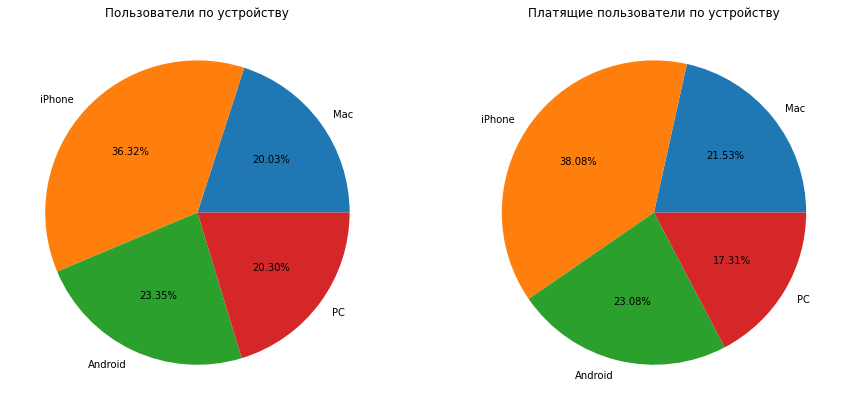

In [117]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
payers_by_device.plot(kind='pie',
                      y = 'users_count',
                      subplots=True,  
                      autopct ='%1.2f%%', 
                      legend=False,
                      ylabel='',
                      ax=ax1)
plt.title('Пользователи по устройству')

ax2 = plt.subplot(1, 2, 2)
payers_by_device.plot(kind='pie',
                     y = 'payers_count',
                     subplots=True,  
                     autopct ='%1.2f%%', 
                     legend=False, 
                     ylabel='',
                     ax=ax2)
plt.title('Платящие пользователи по устройству')

plt.show()

Вывод:

Больше всего зарегистрированных пользователей заходят с Айфонов, далее Андроид, ПК и Мак.

Процент платящих пользователей больше всего также на Айфонах.

Отношение платящих пользователей к их общему количеству больше всего на Мак, далее Айфон, Андроид и ПК.

Пользователей Мак меньше всего, но при этом их "качество" выше чем у всех остальных пользователей.

#### Построим таблицу, отражающую количество пользователей и долю платящих  для каждого канала привлечения.

In [118]:
payers_by_channel = (
    profiles.groupby(
    'channel').agg(
    {'user_id' : 'nunique', 
     'payer' : 'sum'}
).merge((
    (profiles.groupby(
        'channel').agg(
        {'payer' : 'mean'})*100)
    ),
    on = 'channel', 
    how='left')
).rename(
    columns={
        'user_id' : 'users_count', 
        'payer_x' : 'payers_count', 
        'payer_y' : 'payers_pers'}
).sort_values(
    by='payers_pers', 
    ascending=False)

payers_by_channel.round(2)

users_count  payers_count  payers_pers
channel                                                   
FaceBoom                  29144          3557        12.20
AdNonSense                 3880           440        11.34
lambdaMediaAds             2149           225        10.47
TipTop                    19561          1878         9.60
RocketSuperAds             4448           352         7.91
WahooNetBanner             8553           453         5.30
YRabbit                    4312           165         3.83
MediaTornado               4364           156         3.57
LeapBob                    8553           262         3.06
OppleCreativeMedia         8605           233         2.71
organic                   56439          1160         2.06

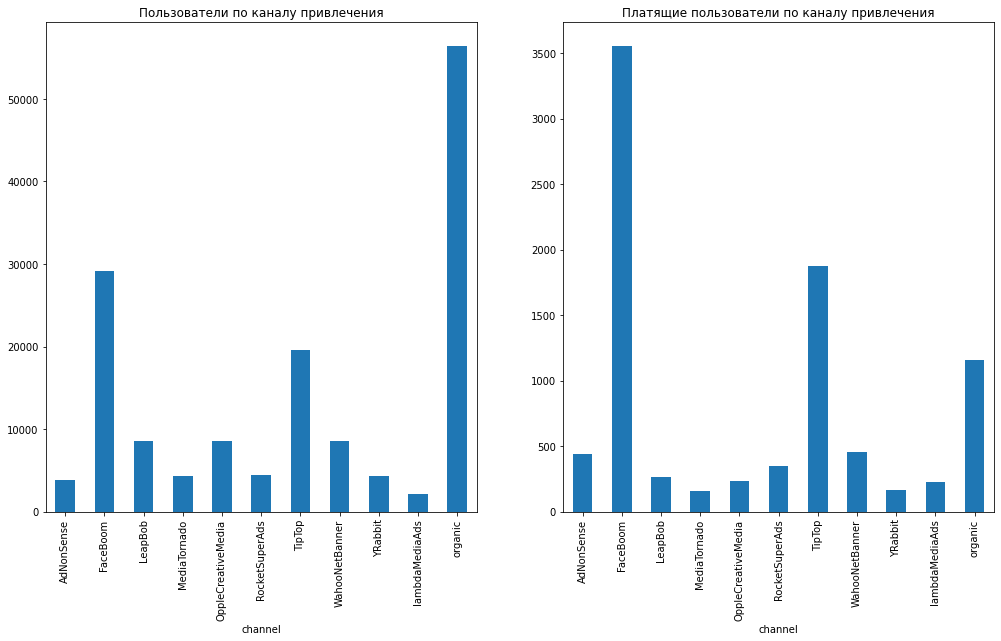

In [119]:
plt.figure(figsize=(17, 9))
ax1 = plt.subplot(1, 2, 1)
payers_by_channel.sort_values(by='channel').plot(kind='bar',
                                                y = 'users_count',
                                                subplots=True,  
                                                fontsize=10,
                                                legend=False,
                                                ylabel='',
                                                ax=ax1)
plt.title('Пользователи по каналу привлечения')

ax2 = plt.subplot(1, 2, 2)
payers_by_channel.sort_values(by='channel').plot(kind='bar',
                                                 y = 'payers_count',
                                                 subplots=True,
                                                 legend=False,
                                                 fontsize=10,
                                                 ylabel='',
                                                 ax=ax2)
plt.title('Платящие пользователи по каналу привлечения')

plt.show()

Вывод:

Больше всего зарегистрированных пользователей (кроме тех кто приходят сами) приходят из FaceBoom, далее идет TipTop и другие.

Процент платящих пользователей больше всего от каналов FaceBoom и TipTop.

Отношение платящих пользователей к их общему количеству больше всего на FaceBoom, далее AdNonSense, lambdaMediaAds и TipTop.

Пользователей AdNonSense и lambdaMediaAds меньше всего, но при этом их "качество" выше чем у всех остальных пользователей (кроме FaceBoom).

#### Общий вывод

В таблице profiles содержится информация о 150 008 профилей пользователей, с датами первого посещения сайта, страной, каналом и устройством входа, в последных столбцах выведен месяц первого вхада и информация о том, покупал ли пользователь что-либо в течение исследуемого периода. 

Минимальная дата привлечения пользователей: 2019-05-01. 

Максимальная дата привлечения пользователей: 2019-10-27.

Они соответствуют границе исследуемого периода.

Больше всего зарегистрированных пользователей приходится на США, далее Франция, Англия и Германия.

Процент платящих пользователей больше всего также в США.

Отношение платящих пользователей к их общему количеству больше всего в США, далее Германия, Англия и Франция.

Пользователей из Германии меньше всего, но при этом их "качество" выше чем у пользователей из Франции и Англии.

Больше всего зарегистрированных пользователей заходят с Айфонов, далее Андроид, ПК и Мак.

Процент платящих пользователей больше всего также на Айфонах.

Отношение платящих пользователей к их общему количеству больше всего на Мак, далее Айфон, Андроид и ПК.

Пользователей Мак меньше всего, но при этом их "качество" выше чем у всех остальных пользователей.

Больше всего зарегистрированных пользователей (кроме тех кто приходят сами) приходят из FaceBoom их около 19%, далее идет TipTop (13%) и другие.

Процент платящих пользователей больше всего от каналов FaceBoom и TipTop.

Отношение платящих пользователей к их общему количеству больше всего на FaceBoom, далее AdNonSense, lambdaMediaAds и TipTop.

Пользователей AdNonSense и lambdaMediaAds меньше всего, но при этом их "качество" выше чем у всех остальных пользователей (кроме FaceBoom).

### Маркетинг <a id="shag4"></a>  
[К содержанию](#soder)

#### Посчитаем общую сумму расходов на маркетинг.

In [120]:
costs['costs'].sum()

105497.30000000002

Вывод

Всего за исследуемый период на рекламу было потрачено 105497.3 $.

#### Выясним как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [121]:
costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by = 'costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

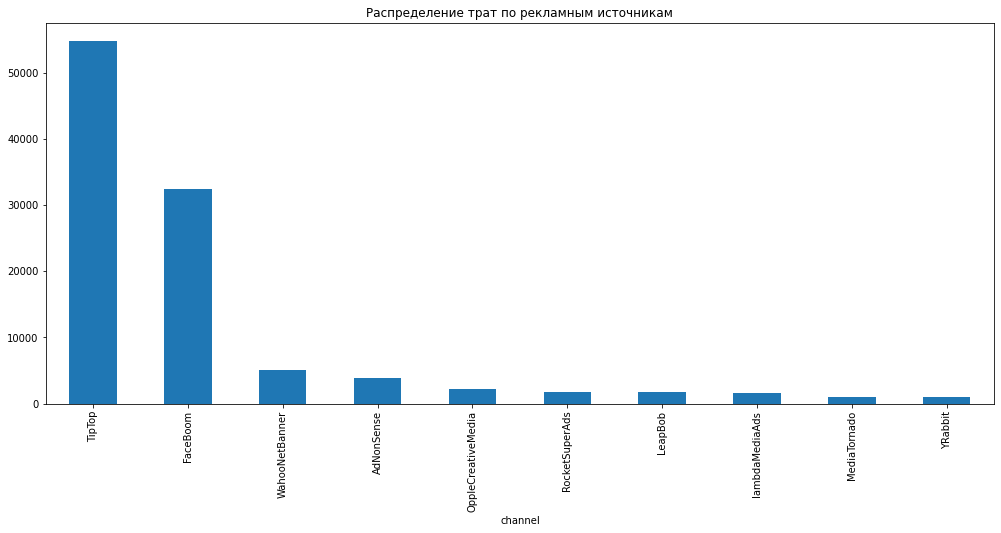

In [122]:
costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by = 'costs', ascending=False).plot(kind='bar',
                     y = 'costs',
                     subplots=True, 
                     legend=False,
                     figsize=(17, 7),                                                                           
                     ylabel='')
plt.title('Распределение трат по рекламным источникам')
plt.show()

Вывод:

Больше всего потратили на рекламу в TipTop и FaceBoom.

Меньше всего на YRabbit, MediaTornado и  lambdaMediaAds.

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику.

In [123]:
costs_monthweek = costs.copy()

In [124]:
costs_monthweek['dt'] = pd.to_datetime(costs_monthweek['dt'])
costs_monthweek['week'] = costs_monthweek['dt'].dt.isocalendar().week
costs_monthweek['month'] = costs_monthweek['dt'].dt.month

weekly_spending = costs_monthweek.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')

In [125]:
weekly_spending

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
18           211.05     535.7    16.80         38.64               24.00   
19           273.00     750.2    31.71         61.68               34.50   
20           265.65     755.7    26.67         59.04               27.50   
21           266.70     722.7    26.67         50.16               34.25   
22           202.65    1208.9    65.52         36.96               81.75   
23           102.90    1081.3    66.99         27.60               79.50   
24            96.60    1042.8    52.29         29.76               71.50   
25           141.75    1280.4    68.46         32.16               79.75   
26           148.05    1647.8    99.75         40.56              107.00   
27           130.20    1536.7    87.36         43.44              102.50   
28           106.05    1124.2    62.58         28.80               81.00   
29            97.65     975.7    61.11         26.40               68.00   
30           118.65    1130.8    67.20         25.20               80.75   
31           141.75    1419.0    83.58         35.04               90.75   
32           116.55    1290.3    87.57         29.04              104.00   
33           117.60    1456.4    77.49         40.80               98.50   
34           142.80    1411.3    90.51         35.28              103.75   
35           133.35    1445.4    77.91         33.84               92.75   
36           100.80    1151.7    66.99         30.24               72.75   
37           100.80    1148.4    63.84         25.92               78.00   
38           139.65    1496.0    81.27         30.24              105.75   
39           192.15    1837.0   101.22         48.24              132.25   
40           155.40    1761.1   101.01         42.00              123.00   
41           136.50    1392.6    78.96         36.96               88.25   
42           118.65    1291.4    69.72         29.04               88.00   
43           154.35    1552.1    84.42         37.44              101.50   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
18               99.450   347.0            49.2    52.20            81.6  
19              139.230   470.0            92.4    75.90           103.2  
20              138.060   454.0            90.0    69.30            90.4  
21              131.040   801.8            79.2    65.40           119.2  
22               97.695  1421.2           179.4    49.80            83.2  
23               76.050  1223.6           196.8    25.80            35.2  
24               63.180  1121.0           166.2    17.46            45.6  
25               80.730  1474.4           201.6    22.14            40.0  
26               78.260  2343.6           285.0    27.90            59.2  
27               75.075  2340.0           256.8    28.26            60.0  
28               55.965  1820.0           174.0    19.44            44.8  
29               41.860  1552.2           159.6    15.66            41.6  
30               54.600  1713.4           182.4    22.86            49.6  
31               61.880  2493.6           204.6    27.33            52.0  
32               69.615  2448.0           231.6    28.56            41.6  
33               62.010  2538.0           238.2    28.56            46.4  
34               40.300  2514.0           244.8    30.03            57.6  
35               51.350  2583.0           235.8    24.36            54.4  
36               40.625  2563.0           174.6    27.93            52.0  
37               40.950  2506.0           192.6    29.76            41.6  
38               56.225  3241.0           226.2    39.60            57.6  
39               63.700  3979.5           303.0    47.52            80.0  
40               66.300  3703.0           309.0    45.36            59.

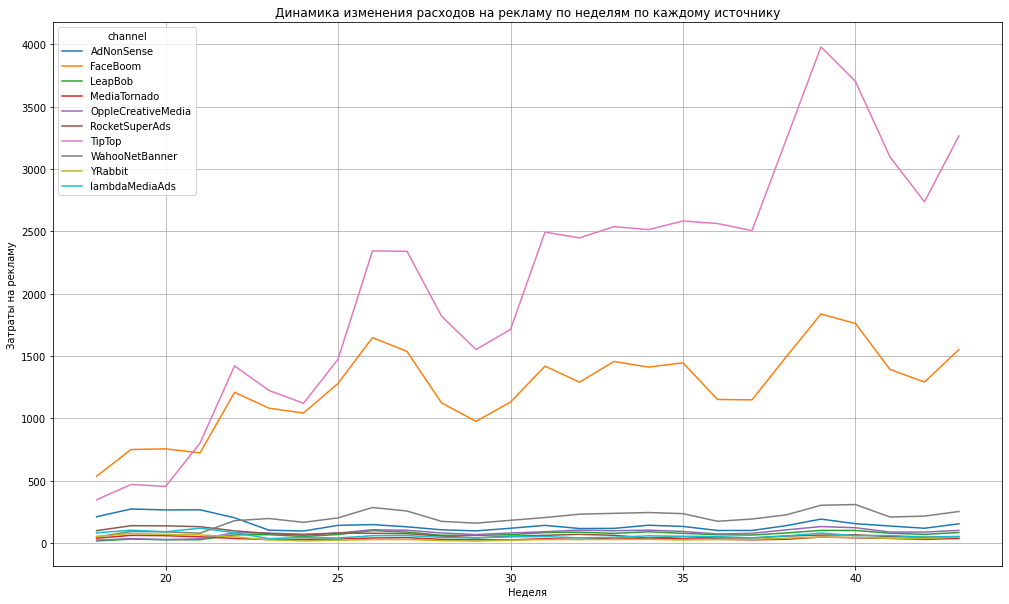

In [126]:
weekly_spending.plot(grid=True, figsize=(17, 10))
plt.xlabel('Неделя')
plt.ylabel('Затраты на рекламу')
plt.title('Динамика изменения расходов на рекламу по неделям по каждому источнику')
plt.show()

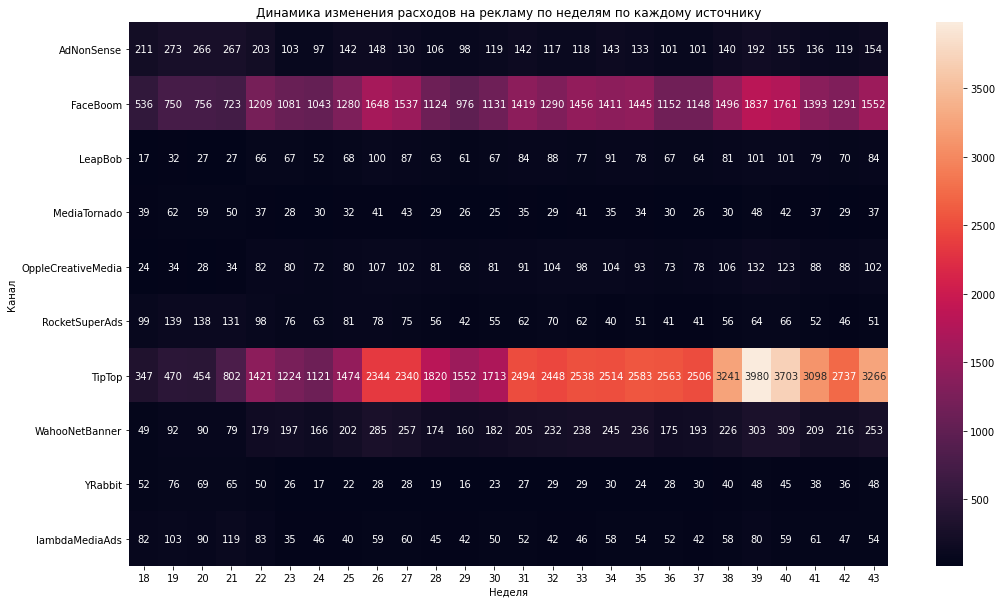

In [127]:
plt.figure(figsize=(17, 10))
sns.heatmap(
    weekly_spending.T,
    annot=True,
    fmt='.0f'
)
plt.xlabel('Неделя')
plt.ylabel('Канал')
plt.title('Динамика изменения расходов на рекламу по неделям по каждому источнику')
plt.show()

Вывод

Расходы на рекламу в TipTop и FaceBoom постоянно растут, пики о обоих пришлись на 39 неделю года.

Расходы на остальные каналы привлечения пользователей примерно одинаковы, по ним не надлюдается значительных колебаний.

#### Визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [128]:
monthly_spending = costs_monthweek.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')

In [129]:
monthly_spending

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                      
5           1169.70    3524.4   140.28        238.56              169.75   
6            538.65    5501.1   314.58        138.00              370.00   
7            504.00    5294.3   313.53        138.48              366.50   
8            579.60    6274.4   369.81        154.56              439.25   
9            581.70    6114.9   343.98        144.72              427.75   
10           537.60    5736.5   315.42        140.16              378.00   

channel  RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                      
5               577.980   2981.0           418.8   299.70           458.4  
6               325.715   6675.6           921.0   106.20           199.2  
7               252.070   8410.2           851.4    97.38           219.2  
8               253.110  11202.0          1040.4   124.74           220.0  
9               218.400  13232.5           977.4   152.79           247.2  
10              205.725  12250.0           942.0   163.41           213.6

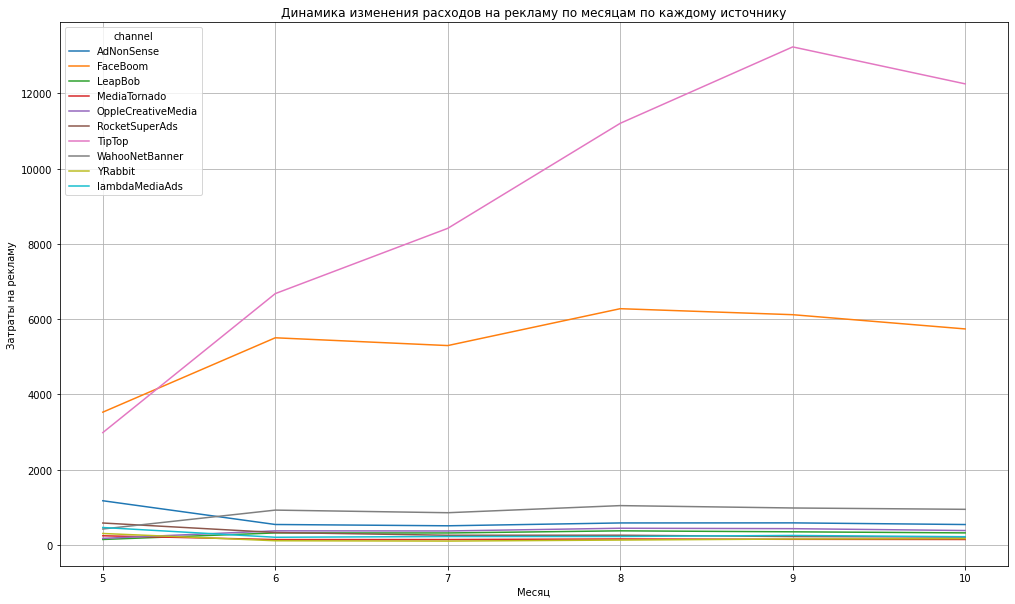

In [130]:
monthly_spending.plot(grid=True, figsize=(17, 10))
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу')
plt.title('Динамика изменения расходов на рекламу по месяцам по каждому источнику')
plt.show()

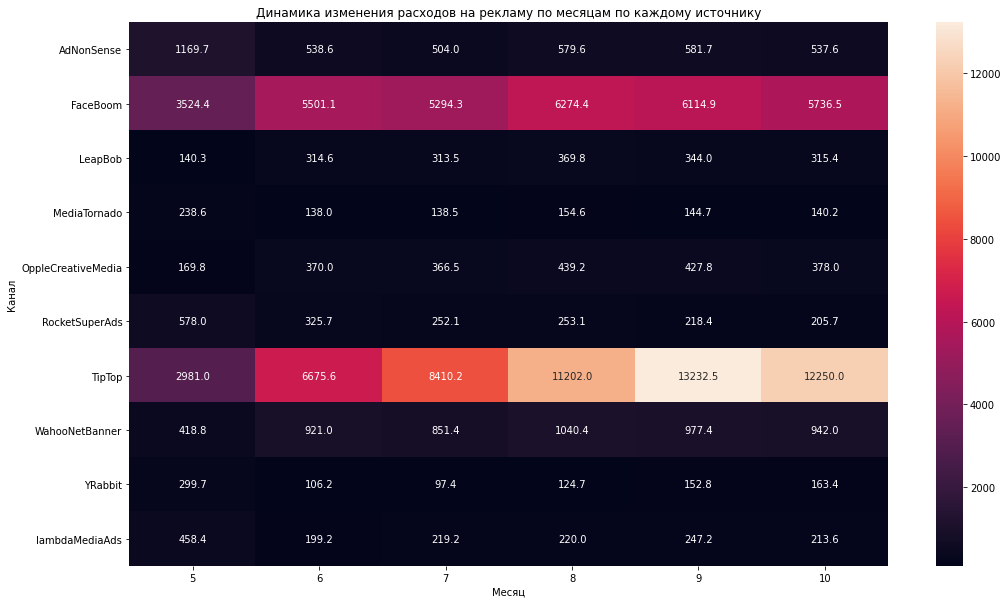

In [131]:
plt.figure(figsize=(17, 10))
sns.heatmap(
    monthly_spending.T,
    annot=True, 
    fmt='.1f'
)
plt.xlabel('Месяц')
plt.ylabel('Канал')
plt.title('Динамика изменения расходов на рекламу по месяцам по каждому источнику')
plt.show()

Вывод

Расходы на рекламу в TipTop и FaceBoom постоянно растут, пик стоимости рекламы в TipTop пришелся на сентябрь.

Расходы на остальные каналы привлечения пользователей примерно одинаковы, по ним не надлюдается значительных колебаний.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [48]:
profiles.pivot_table(
    index='channel', 
    values='acquisition_cost', 
    aggfunc='mean').sort_values(
    by = 'acquisition_cost', 
    ascending=False).round(2)

acquisition_cost
channel                             
TipTop                          2.80
FaceBoom                        1.11
AdNonSense                      1.01
lambdaMediaAds                  0.72
WahooNetBanner                  0.60
RocketSuperAds                  0.41
OppleCreativeMedia              0.25
YRabbit                         0.22
MediaTornado                    0.22
LeapBob                         0.21
organic                         0.00

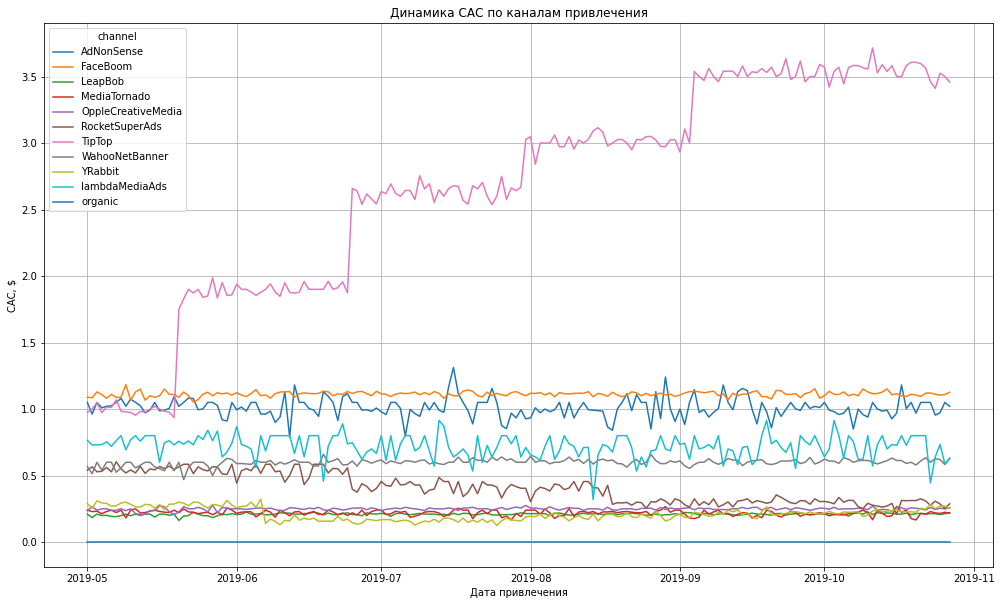

In [49]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(17, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Вывод

В среднем самым дорогим источником привлечения пользователей является TipTop, средняя стоимость привлечения пользователей окло 2,8\\$. 

Стоимость привлечения постоянно растет, начиная с 1\\$ в мае до 3,5\\$ в сентябре-октябре. График динамики САС внешне напоминает лестницу, примерно в середине мая, двадцатых числах июня, конце июля и начале сентября наблюдаются резкие скачки стоимости привлечения пользователей, этому может быть два объяснения: в эти даты проводили рекламные кампании, или по каким-то причинам снижалось количество привлеченных клиентов.

Проверим это далее.

Привлечение клиентов через FaceBoom и AdNonSense обходится  примерно в 1\\$, эти графики выглядят более стабильными. 

#### Проверим, почему наблюдаются резкие скачки стоимости привлечения пользователей в TipTop.

In [50]:
profiles.query('channel == "TipTop"').groupby('month').agg({'user_id' : 'count', 'acquisition_cost' : 'sum'})

user_id  acquisition_cost
month                           
5         2196            2981.0
6         3213            6675.6
7         3173            8410.2
8         3720           11202.0
9         3802           13232.5
10        3457           12250.0

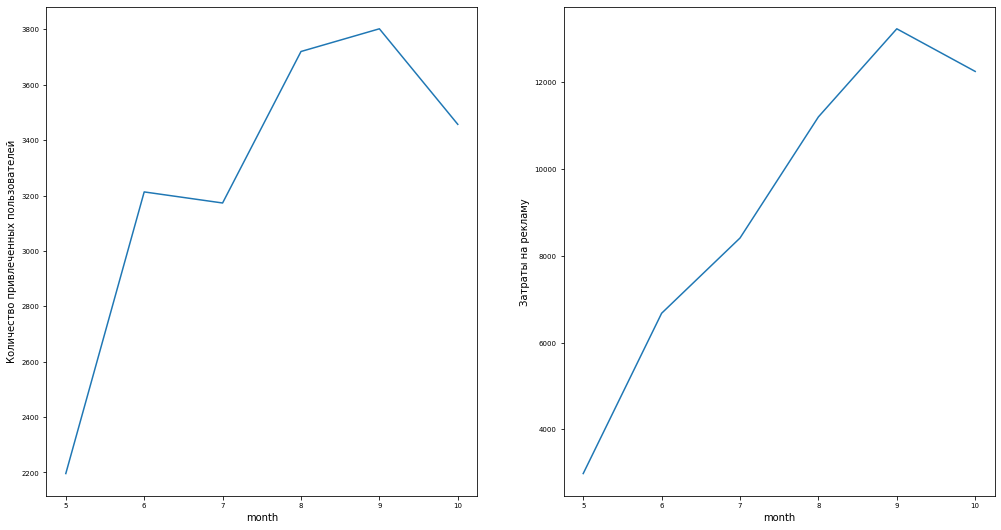

In [51]:
plt.figure(figsize=(17, 9))
ax1 = plt.subplot(1, 2, 1)
profiles.query(
    'channel == "TipTop"').groupby(
    'month').agg({'user_id' : 'count', 'acquisition_cost' : 'sum'}
                ).plot(y = 'user_id',
                      subplots=True,
                      fontsize=7,
                      legend=False,
                      ylabel='Количество привлеченных пользователей',
                      ax=ax1)
plt.title('')

ax2 = plt.subplot(1, 2, 2)
profiles.query(
    'channel == "TipTop"').groupby(
    'month').agg({'user_id' : 'count', 'acquisition_cost' : 'sum'}
                ).plot(y = 'acquisition_cost',
                     subplots=True,
                     legend=False,
                     fontsize=7,
                     ylabel='Затраты на рекламу',
                     ax=ax2)
plt.title('')

plt.show()

In [52]:
profiles.query('channel == "TipTop"').groupby('week').agg({'user_id' : 'count', 'acquisition_cost' : 'sum'})

user_id  acquisition_cost
week                           
18        347             347.0
19        473             470.0
20        462             454.0
21        434             801.8
22        747            1421.2
23        647            1223.6
24        590            1121.0
25        768            1474.4
26        941            2343.6
27        888            2340.0
28        691            1820.0
29        589            1552.2
30        650            1713.4
31        862            2493.6
32        815            2448.0
33        836            2538.0
34        834            2514.0
35        861            2583.0
36        758            2563.0
37        711            2506.0
38        917            3241.0
39       1129            3979.5
40       1048            3703.0
41        863            3097.5
42        768            2737.0
43        932            3265.5

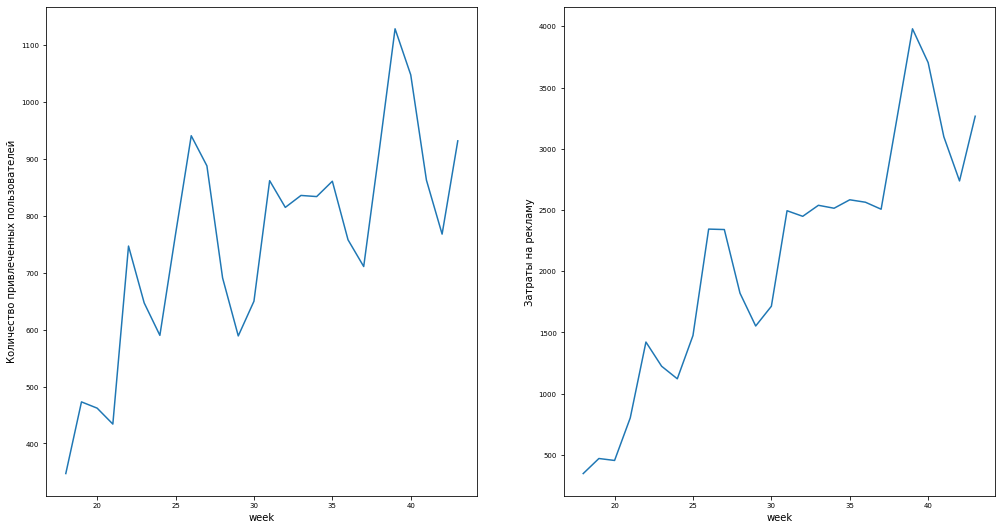

In [53]:
plt.figure(figsize=(17, 9))
ax1 = plt.subplot(1, 2, 1)
profiles.query(
    'channel == "TipTop"').groupby(
    'week').agg({'user_id' : 'count', 'acquisition_cost' : 'sum'}
                ).plot(y = 'user_id',
                      subplots=True,
                      fontsize=7,
                      legend=False,
                      ylabel='Количество привлеченных пользователей',
                      ax=ax1)
plt.title('')

ax2 = plt.subplot(1, 2, 2)
profiles.query(
    'channel == "TipTop"').groupby(
    'week').agg({'user_id' : 'count', 'acquisition_cost' : 'sum'}
                ).plot(y = 'acquisition_cost',
                     subplots=True,
                     legend=False,
                     fontsize=7,
                     ylabel='Затраты на рекламу',
                     ax=ax2)
plt.title('')

plt.show()

Вывод

Снижения количества привлеченных пользователей не наблюдается, скачки стоимости привлечения пользователей из TipTop обусловлены проведением ежемесячных рекламных кампаний.

Стоит проверить окупается ли повышение стоимости привлечения пользователей в следующем разделе.

#### Общий вывод

Всего за исследуемый период на рекламу было потрачено 105497,3\\$.

Больше всего потратили на рекламу в TipTop и FaceBoom.

Меньше всего на YRabbit, MediaTornado и lambdaMediaAds.

Расходы на рекламу в TipTop и FaceBoom постоянно растут, пики о обоих пришлись на 39 неделю года.

Расходы на остальные каналы привлечения пользователей примерно одинаковы, по ним не надлюдается значительных колебаний.

Расходы на рекламу в TipTop и FaceBoom постоянно растут, пик стоимости рекламы в TipTop пришелся на сентябрь.

Расходы на остальные каналы привлечения пользователей примерно одинаковы, по ним не наблюдается значительных колебаний.

В среднем самым дорогим источником привлечения пользователей является TipTop, средняя стоимость привлечения пользователей около 2,8\\$. 

Стоимость привлечения постоянно растет, начиная с 1\\$ в мае до 3,5\\$ в сентябре-октябре. График динамики САС внешне напоминает лестницу, примерно в середине мая, двадцатых числах июня, конце июля и начале сентября наблюдаются резкие скачки стоимости привлечения пользователей, этому может быть два объяснения: в эти даты проводили рекламные кампании, или по каким-то причинам снижалось количество привлеченных клиентов.

Проверим это далее.

Привлечение клиентов через FaceBoom и AdNonSense обходится  примерно в 1\\$, эти графики выглядят более стабильными. 

Снижения количества привлеченных пользователей не наблюдается, скачки стоимости привлечения пользователей из TipTop обусловлены проведением ежемесячных рекламных кампаний.

Стоит проверить окупается ли повышение стоимости привлечения пользователей в следующем разделе.

### Оцените окупаемость рекламы <a id="shag5"></a>  
[К содержанию](#soder)

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [54]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles_ad = profiles.query('channel != "organic"')

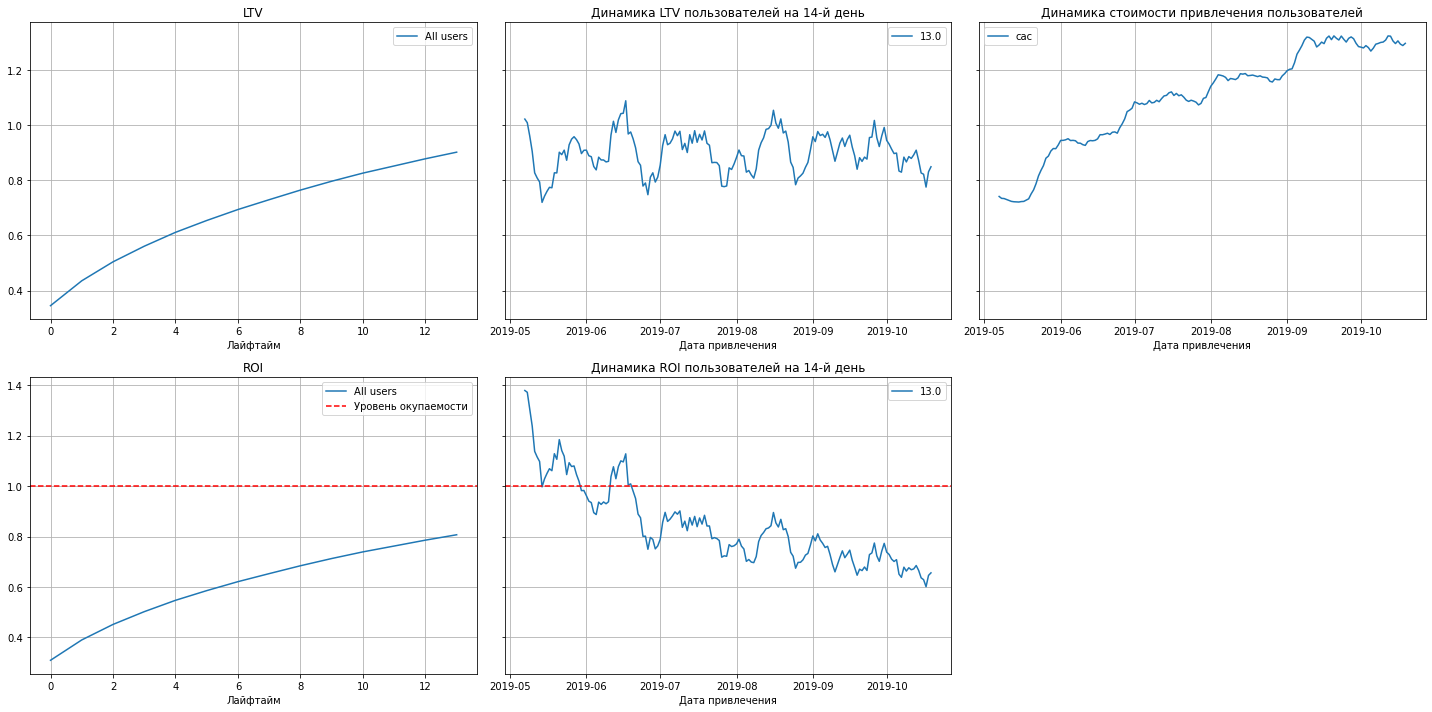

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days, dimensions=[]
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

Вывод:

Пожизненная ценность клиента к концу второй недели составляет около 0,9\\$, LTV колеблется от 0,7\\$ до 1,1\\$ на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

При этом стоимость привлечения пользователей (САС) постоянно увеличивается с 0,7\\$ в мае до 1,3\\$ к концу октября.

Коэффициент рентабельности инвестиций меньше единицы, значит реклама не окупается, так же на графике динамики ROI наблидается падение с 1,4 в мае до 0,6 к концу октября, это говорит о снижении эффективности рекламной стратегии.

#### Проверим конверсию и удержание пользователей, а так же динамику их изменения.

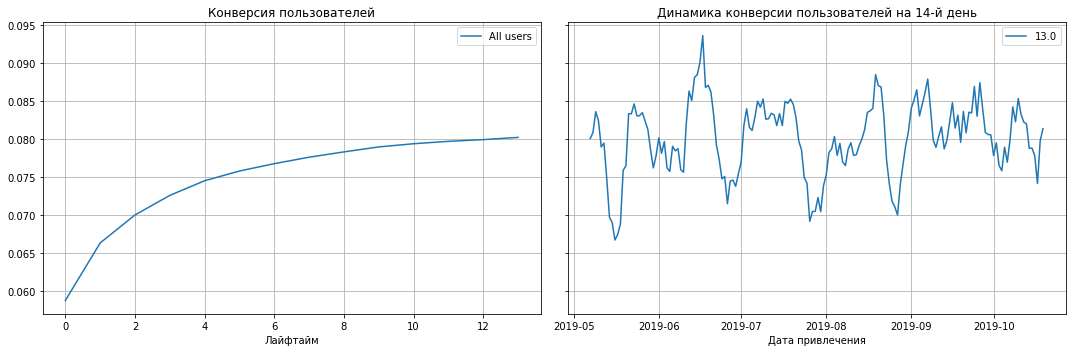

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ad, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Вывод:

Конверсия к 14 лайфтайму составляет около 8%.

В середине мая, конце июня, конце июля и конце августа конверсия четырнадцатого дня снижается до 7%.

В середине июня конверсия 14-го дня достигла пика 9,5%.

в сентябре-октябре колебания конверсии стали менее заметны.

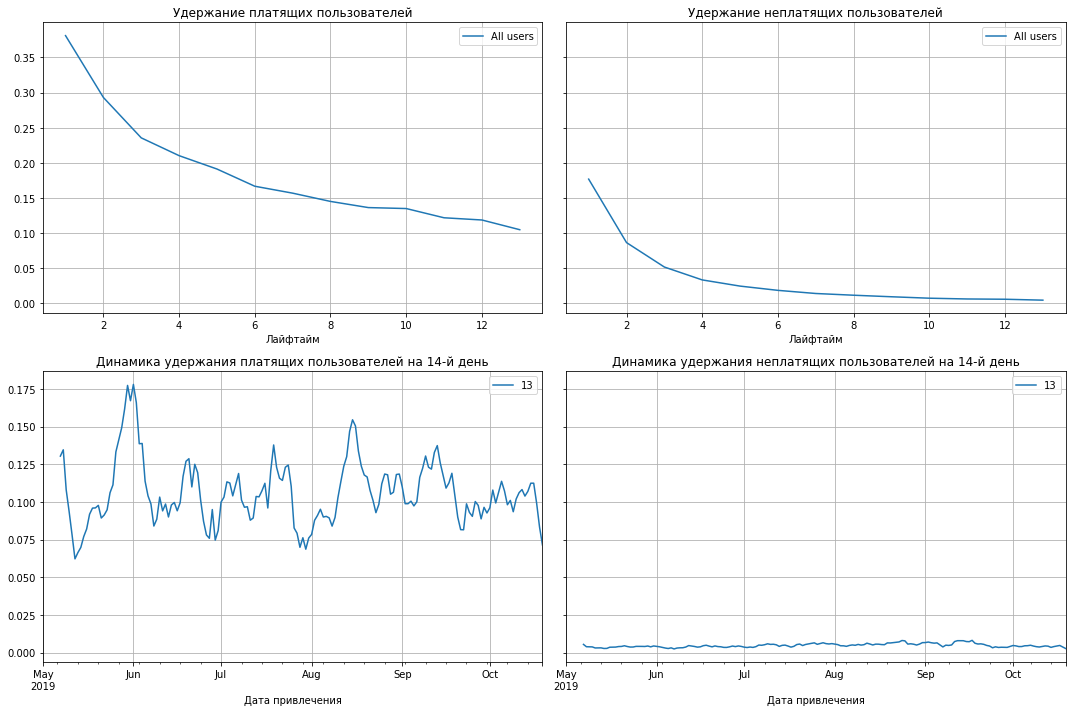

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ad, visits, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод:

Удержание платящих пользователей к 14-му дню составляет окло 10%, для неплатящих этот параметр составляет 10% на 1-2 день, а к 14-му приближается к нулю.

Удержание платящих пользователей на 14-й день в середине мая было ниже всего и составляла окло 6%, также падения до 7,5% наблюдались в конце июня и конце июля. 

Самое высокое значение удержания платяжих пользователей на 14-й день наблюдалось в конце мая - начале июня, так же значение удержания превысио 15% в середине августа.

Удержание неплатящих пользвателей стабильно держится на уровне примерно 1% на протяжении всего исслудемого периода.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам.

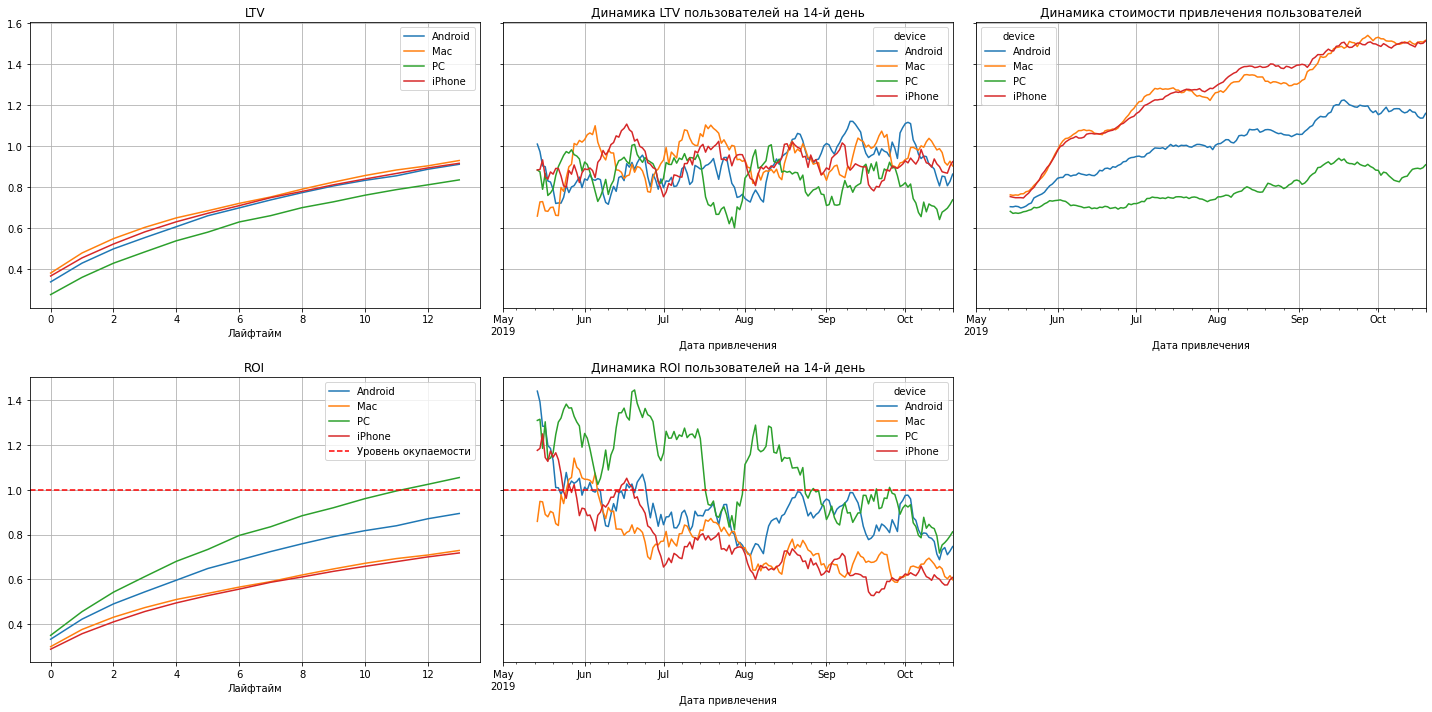

In [58]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Вывод:

Пожизненная ценность клиента к концу второй недели составляет около 0,9\\$ для пользователей android, mac и iphone, а для пользователей РС немного ниже, на уровне 0,85\\$, LTV колеблется от 0,6\\$ до 1\\$ для пользователей РС, пики LTV для пользователей android, mac и iphone колеблется от 0,7\\$ до 1,1\\$ на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

Стоимость привлечения пользователей (САС) ниже всего для пользователей РС, она постоянно увеличивается с 0,7\\$ в мае до 0,9\\$ к концу октября. Далее идут пользователи android (с 0,7\\$ в мае до 1\\$ к середине сентября, а далее произошло небольшое снижение к концу октября). Пользователи mac и iphone "стоят" дороже всего (с 0,8\\$ в мае до 1,5\\$ к концу октября).
 
Коэффициент рентабельности инвестиций для пользователей android, mac и iphone меньше единицы, значит реклама не окупается, а для пользователей РС после 11 лайфтайма становится немного ниже единицы и начинает окупаться.

Так же на графике динамики ROI для пользователей android, mac и iphone наблидается падение с 1,2 в мае до 0,6 к концу октября. У пользователей РС до сентября значения ROI почти всегда превышало 1, но в сентябре и октябре снизилось до 0,7, это говорит о снижении эффективности рекламной стратегии.

#### Проанализируем окупаемость рекламы с разбивкой по странам.

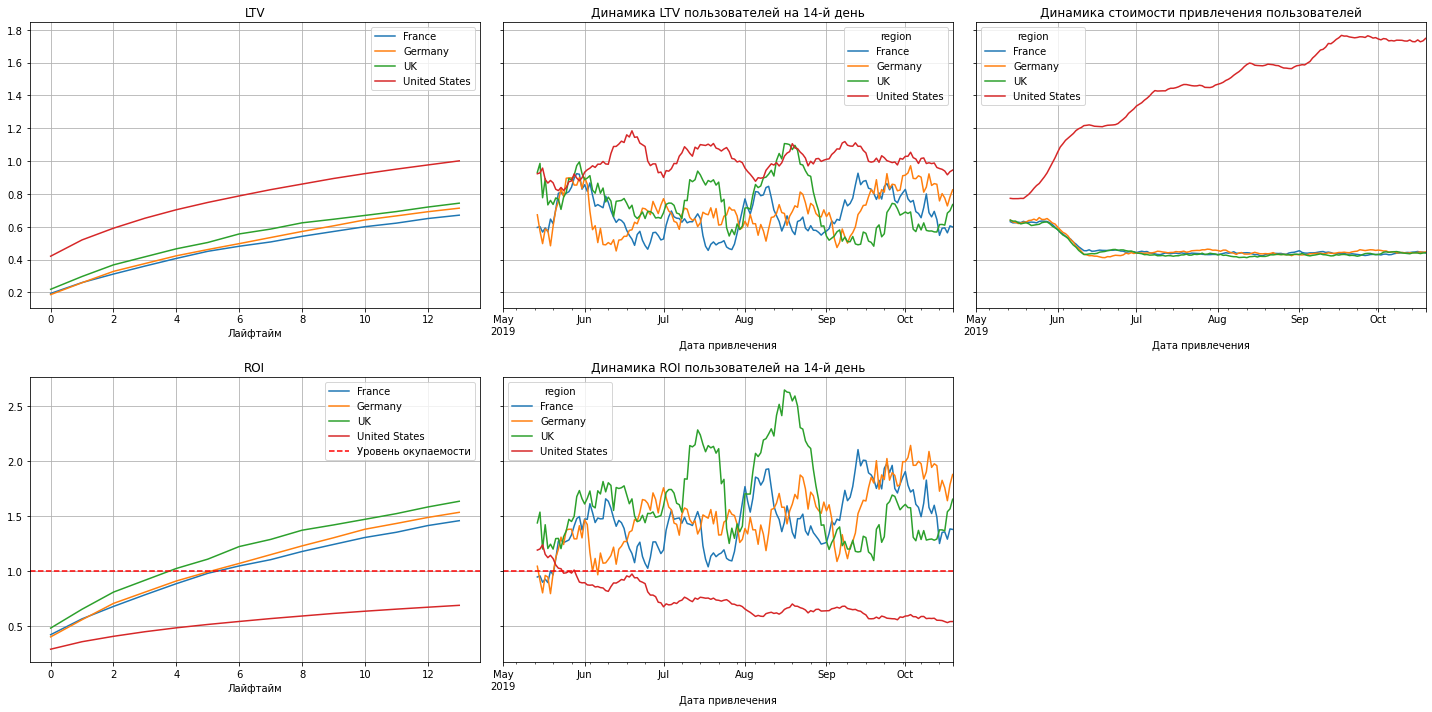

In [59]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

Вывод:

Пожизненная ценность клиента к концу второй недели составляет около 0,8\\$ для пользователей из Германии, Англии и Франции, а для пользователей из США немного выше, и доходит до 1\\$, LTV у Американцев выше других на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

Стоимость привлечения пользователей (САС) в июне снизилась для пользователей из Германии, Англии и Франции с 0,6\\$ до 0,4\\$, а для пользователей из США она постоянно повышалась до 1,8\\$.

Коэффициент рентабельности инвестиций для пользователей Германии, Англии и Франции превышает единицу начиная с 4-5 дня, а для Американцев доходит только до 0,7, значит реклама в США не окупается.

Так же на графике динамики ROI для пользователей из Германии, Англии и Франции ROI стабильно выше 1, а для пользователей из Англии в середине июля и августа доходит до 2,25 и 2,6 соответственно. У пользователей из США значения ROI с мая до конца октября упали с 1,2 до 0,5 это говорит о снижении эффективности рекламной стратегии для США.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

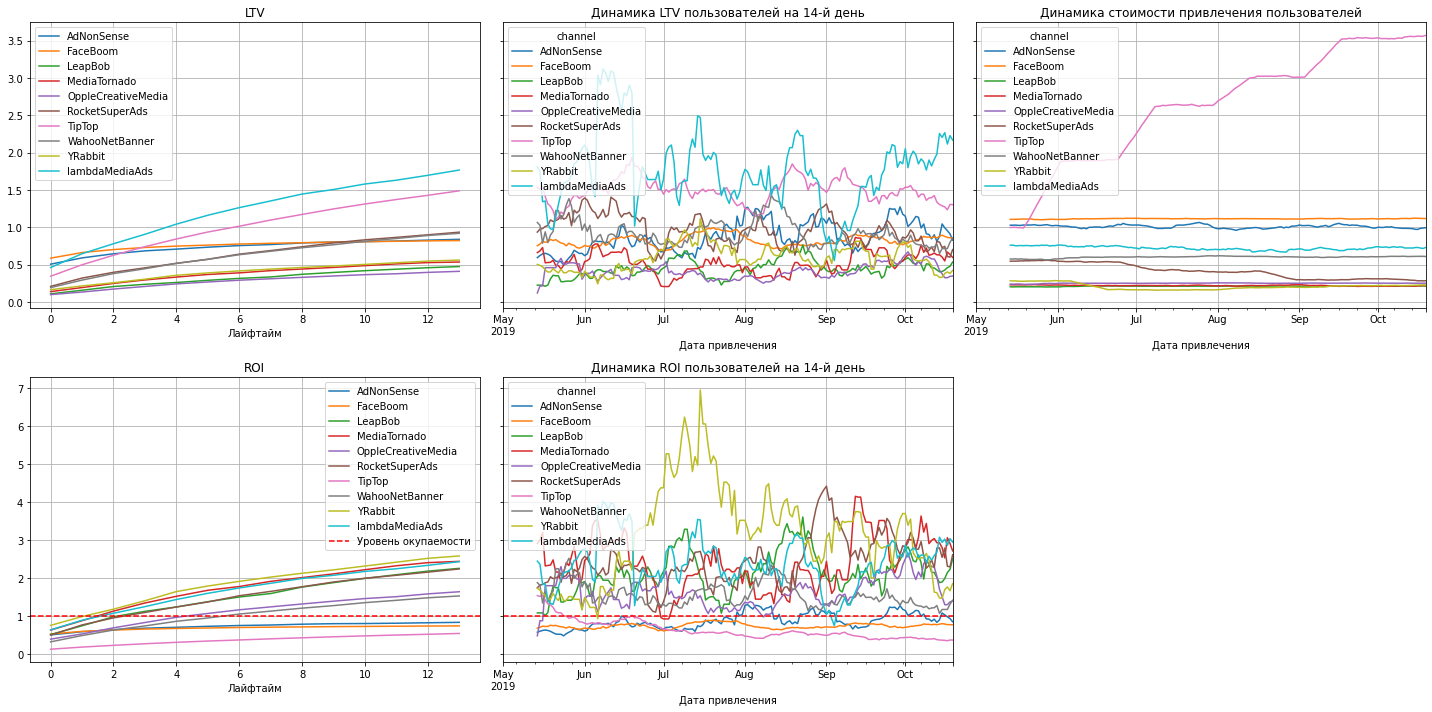

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

In [61]:
roi[13].sort_values()

channel
TipTop                0.539532
FaceBoom              0.737790
AdNonSense            0.831337
WahooNetBanner        1.526304
OppleCreativeMedia    1.637075
RocketSuperAds        2.237019
LeapBob               2.252399
lambdaMediaAds        2.428712
MediaTornado          2.436519
YRabbit               2.578086
Name: 13.0, dtype: float64

Вывод:

LTV выше всего для пользователей lambdaMediaAds и TipTop и к концу втрой недели доходит до 1,5\\$ и 1,8\\$ соответственно.

Самые лучшие показатели LTV в динамике также у lambdaMediaAds и TipTop, причем lambdaMediaAds с начала сентября стабильно растет, а в начале июня LTV lambdaMediaAds достигал 3,2\\$.

Стоимость привлечения пользователей стабильна для всех каналов кроме TipTop, для него стоимость привлечения возрасла с 1\\$ до 3,5\\$.

Показатель ROI для большинства каналов превышает 1, реклама не окупается только для AdNonSense, FaceBoom и TipTop, самая лучшая окупаемость у lambdaMediaAds, MediaTornado и YRabbit.

Лучшее значение ROI показал канал YRabbit в середине июля, достигнув значения 7. Высокие показатели ROI дл YRabbit обусловлены в большей степени низкой стоимостью рекламы, чем высоким LTV.

#### Проанализируем конверсию и её динамику с разбивкой по устройствам.

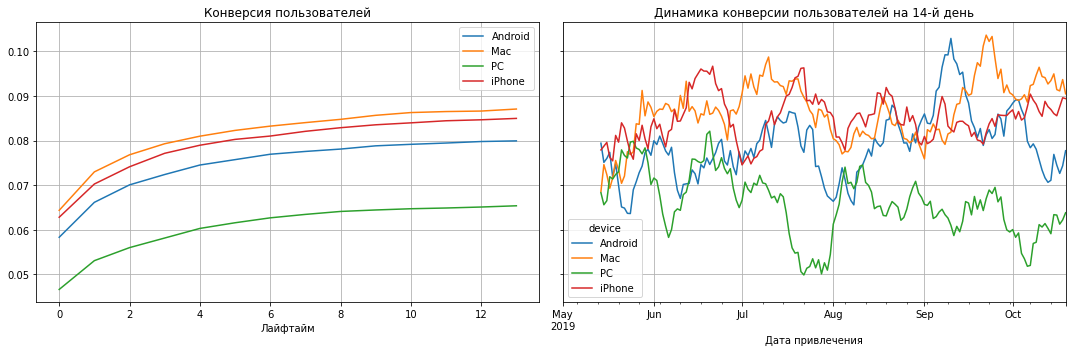

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Вывод: 

Лучшие показатели конверсии у Mac, до 8 %. Худшие у PC, до 6,5 %.

В динамике конверсии 14-го заметен резкий провал у пользователей РС в конце июля до 5%, резкий скачок у пользователей andriod в 10-х числах сентября до 10,5% и резкий скачок у пользователей Mac в 20-х числах сентября до 10,5%.

#### Проанализируем конверсию и её динамику с разбивкой по странам.

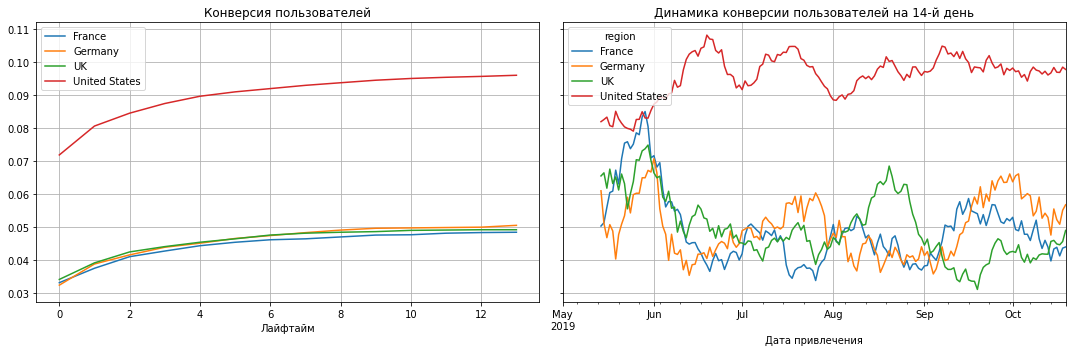

In [63]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Вывод: 

Лучшие показатели конверсии у США, до 9,5%. Для остальных стран показатель примерно на одном уровне, около 5%.

В динамике конверсии 14-го для заметно снижение конверсии у Англии, Франции и Германии с 6% в мае до 5% в октябре, зато в США конверсия возрастала с 8% до 11% до середины июня, и сохраняется на уровне окло 9% на протяжении всего периода исследования.

#### Проанализируем конверсию и её динамику с разбивкой по рекламным каналам.

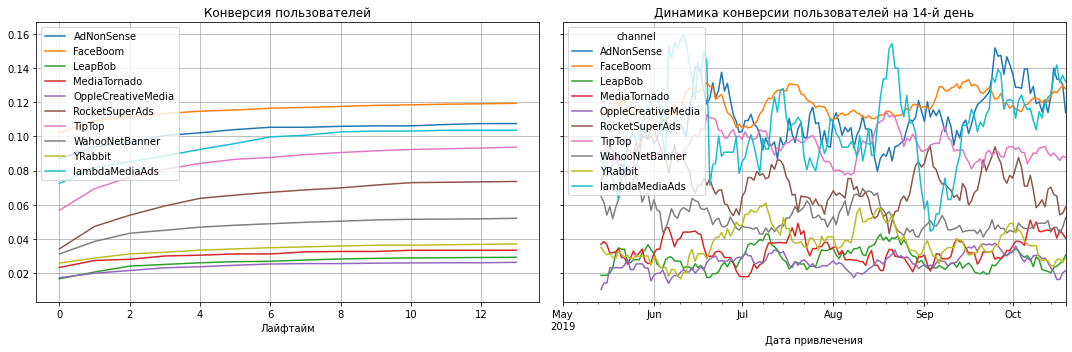

In [64]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ad, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Вывод:

Самая высокая конверсия у канала FaceBoom, к концу второй недели она достигает 12%, далее идут AdNonSense, lambdaMediaAds и TipTop, из конверсия 14-го дня примерно на уровне 10%.

Динамика конверсии пользователей на 14-й день наиболее нестабильна для lambdaMediaAds, в середине июня и августа она достигает 16%, а в начале сентября снижается до 5%.

#### Проанализируем удержание и его динамику с разбивкой по устройствам.

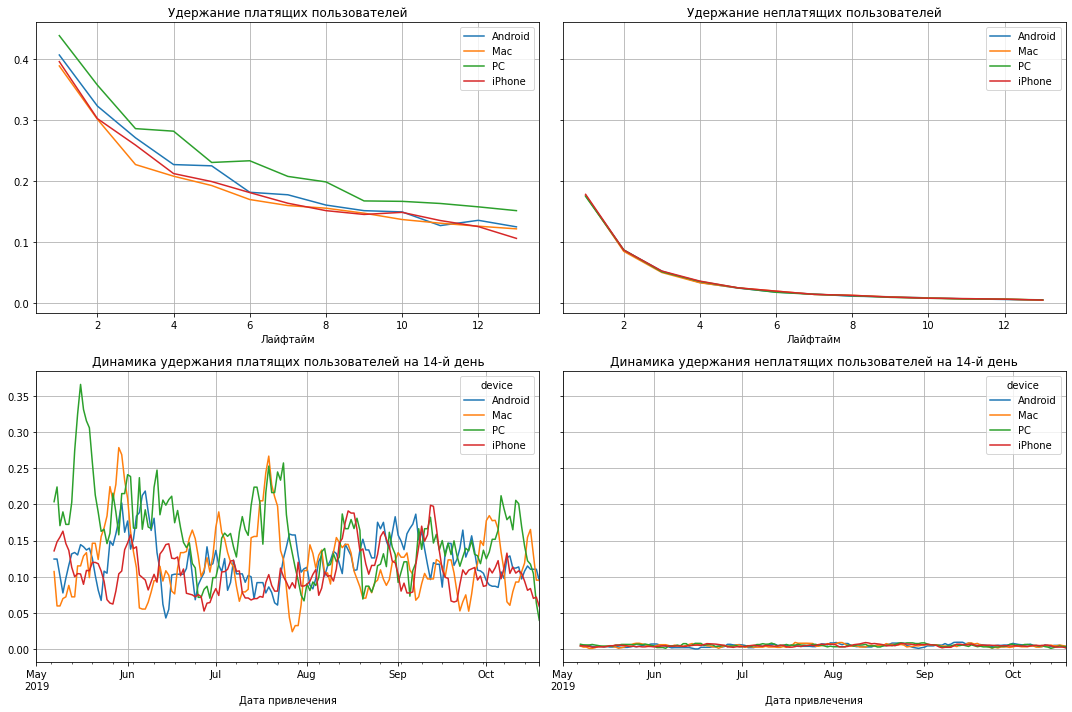

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                  visits, 
                  observation_date, 
                  horizon_days, 
                  dimensions = ['device'], 
                  ignore_horizon = False
                 )
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей примерно одинаково для всех устройств и к 14 дню достигает 10% для iphohe, 12-13% для mac и android и 15% для PC.

Удержание неплатящих пользователей примерно одинаково для всех устройств и стремится к нулю.

В середине мая удержание платящих пользователей РС достигало 37%, так же неплохо себя показали РС и mac в конце мая и середине июля, тогда показатели удержания у обоих устройств достигали 25%.

#### Проанализируем удержание и его динамику с разбивкой по странам.

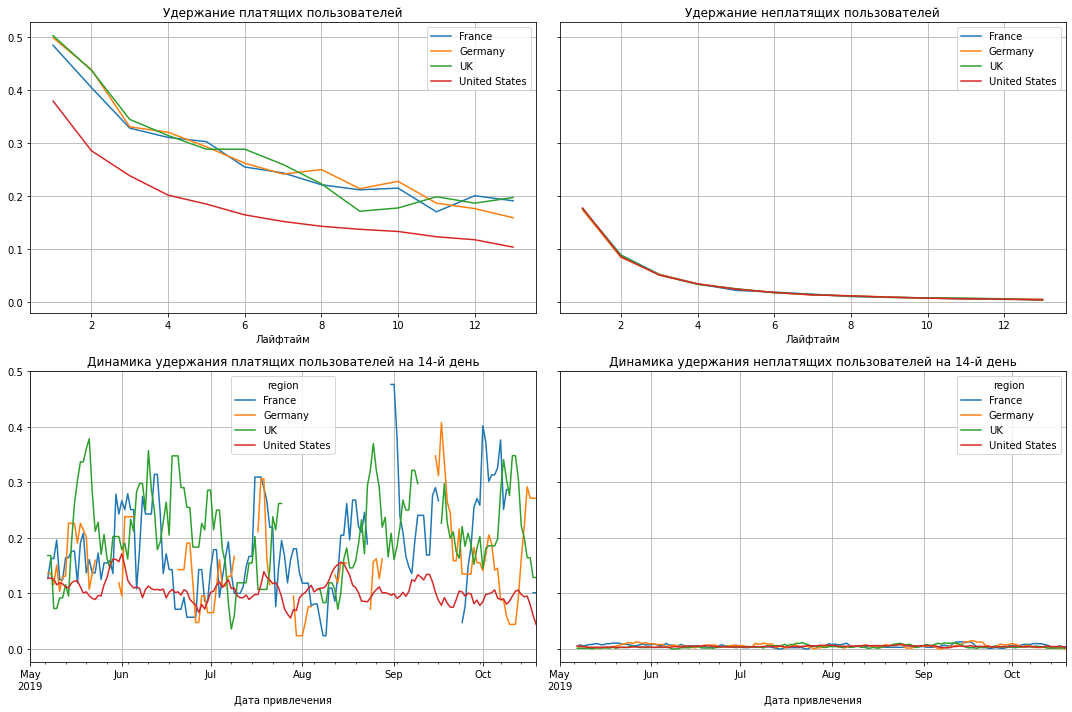

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                  visits, 
                  observation_date, 
                  horizon_days, 
                  dimensions = ['region'], 
                  ignore_horizon = False
                 )
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей примерно одинаково для стран Европы и к 14 дню достигает 15-20%. Удержание для пользователей из США к 14 дню достигает лишь 10%

Удержание неплатящих пользователей примерно одинаково для всех стран и стремится к нулю.

#### Проанализируем удержание и его динамику с разбивкой по рекламным каналам.

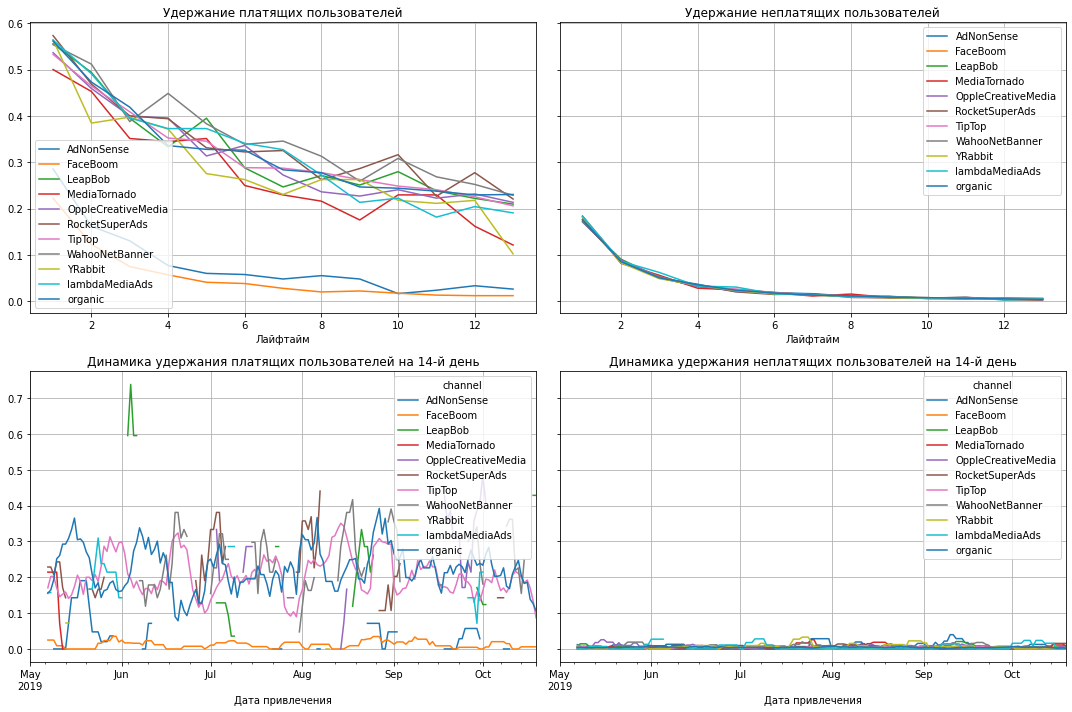

In [67]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, 
                  visits, 
                  observation_date, 
                  horizon_days, 
                  dimensions = ['channel'], 
                  ignore_horizon = False
                 )
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей примерно одинаково для большинства каналов и к 14 дню достигает 20-25%. У MediaTomado и YRabbiit удержание 14 для достигает 10-12%. Хуже всего показывают себя AdNonSense и FaceBoom, их удержание близко к нулю.

Удержание неплатящих пользователей примерно одинаково для всех стран и стремится к нулю.

#### Сравним, окупаемость рекламы на разных каналах в разных странах.

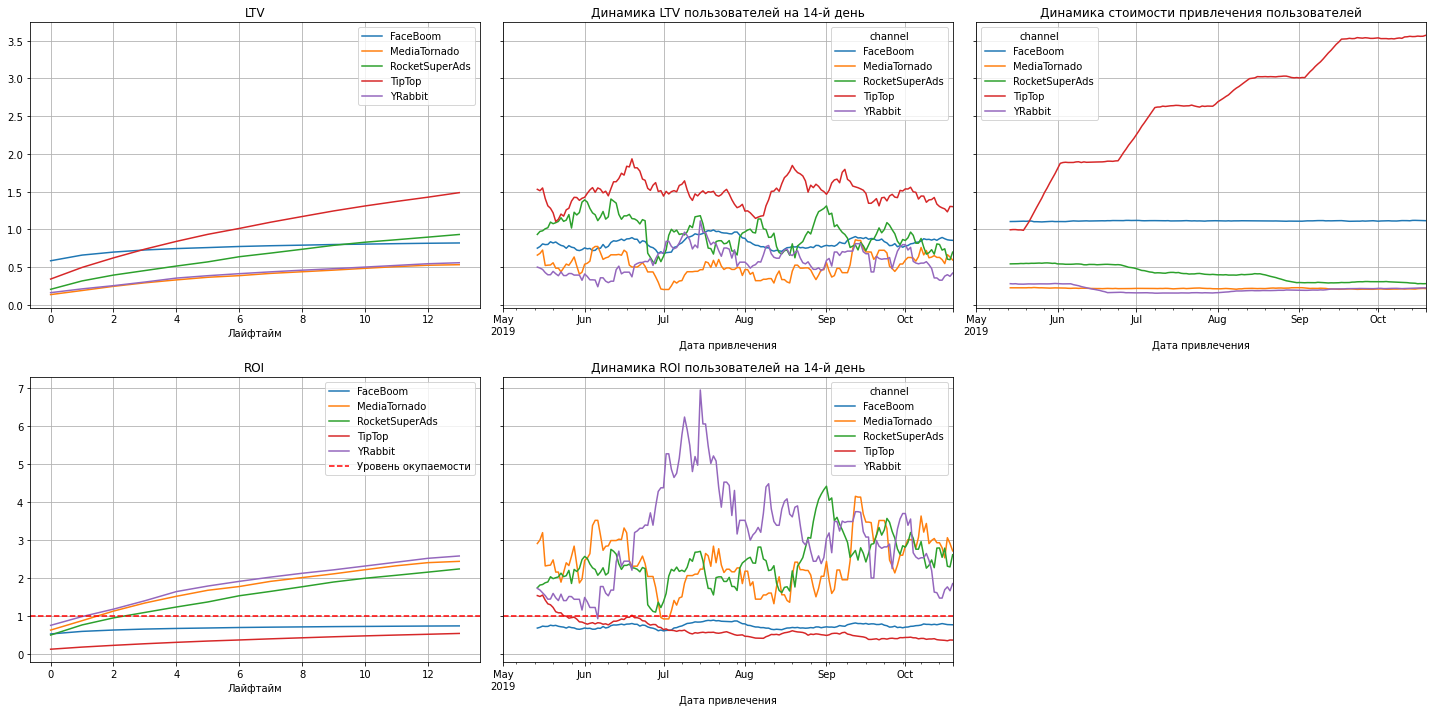

channel
TipTop            0.539532
FaceBoom          0.737790
RocketSuperAds    2.237019
MediaTornado      2.436519
YRabbit           2.578086
Name: 13.0, dtype: float64

In [68]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)
roi[13].sort_values()

В США работают 5 рекламных платформ, три из них RocketSuperAds, MediaTornado и YRabbit хорошо окупаются, но TipTop и FaceBoom не окупаются из-за высокой стоимости привлечения пользователей.

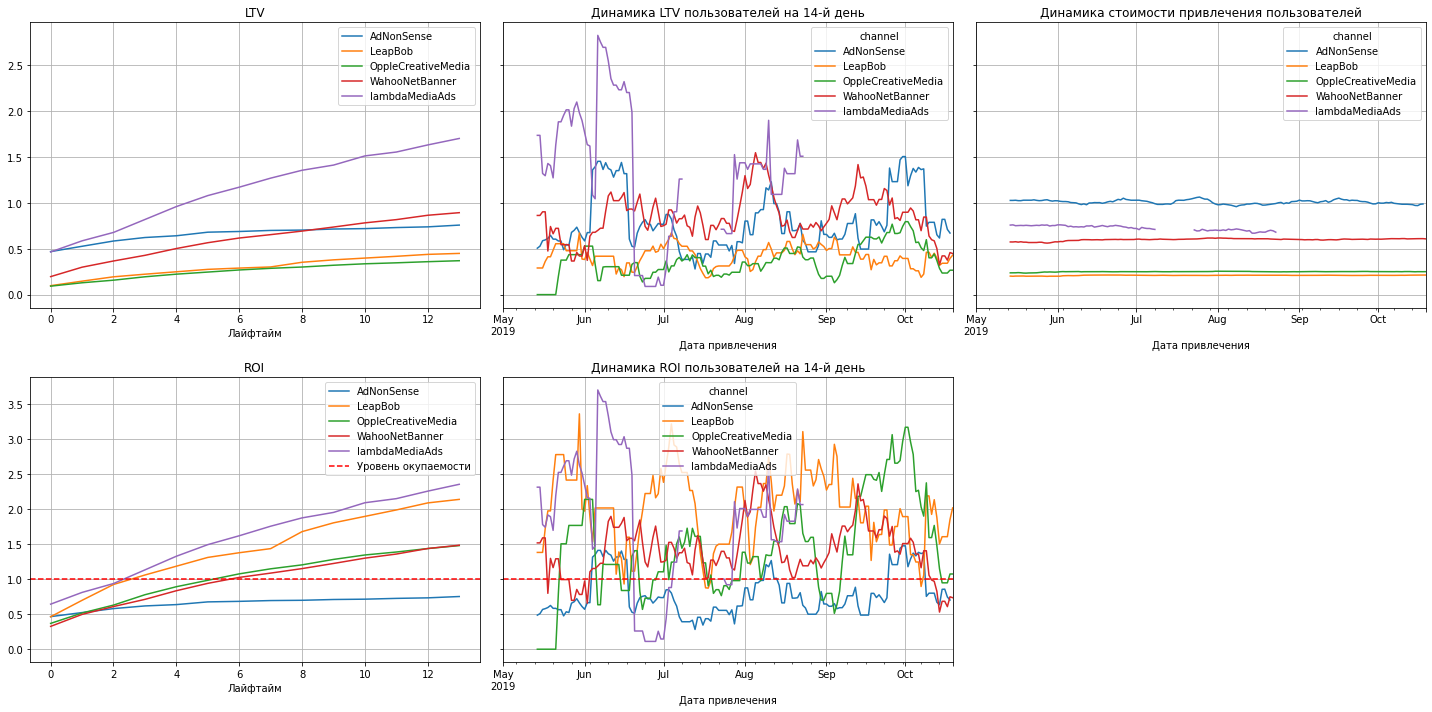

channel
AdNonSense            0.752342
OppleCreativeMedia    1.479690
WahooNetBanner        1.484629
LeapBob               2.139287
lambdaMediaAds        2.354696
Name: 13.0, dtype: float64

In [69]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad.query('region == "France"'), orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)
roi[13].sort_values()

Во Франции работают 5 рекламных платформ, две из них LeapBob и lambdaMediaAds хорошо окупаются, еще две OppleCreativeMedia и WahooNetBannerокупаются немного хуже, и AdNonSense не окупается из-за высокой стоимости привлечения пользователей.

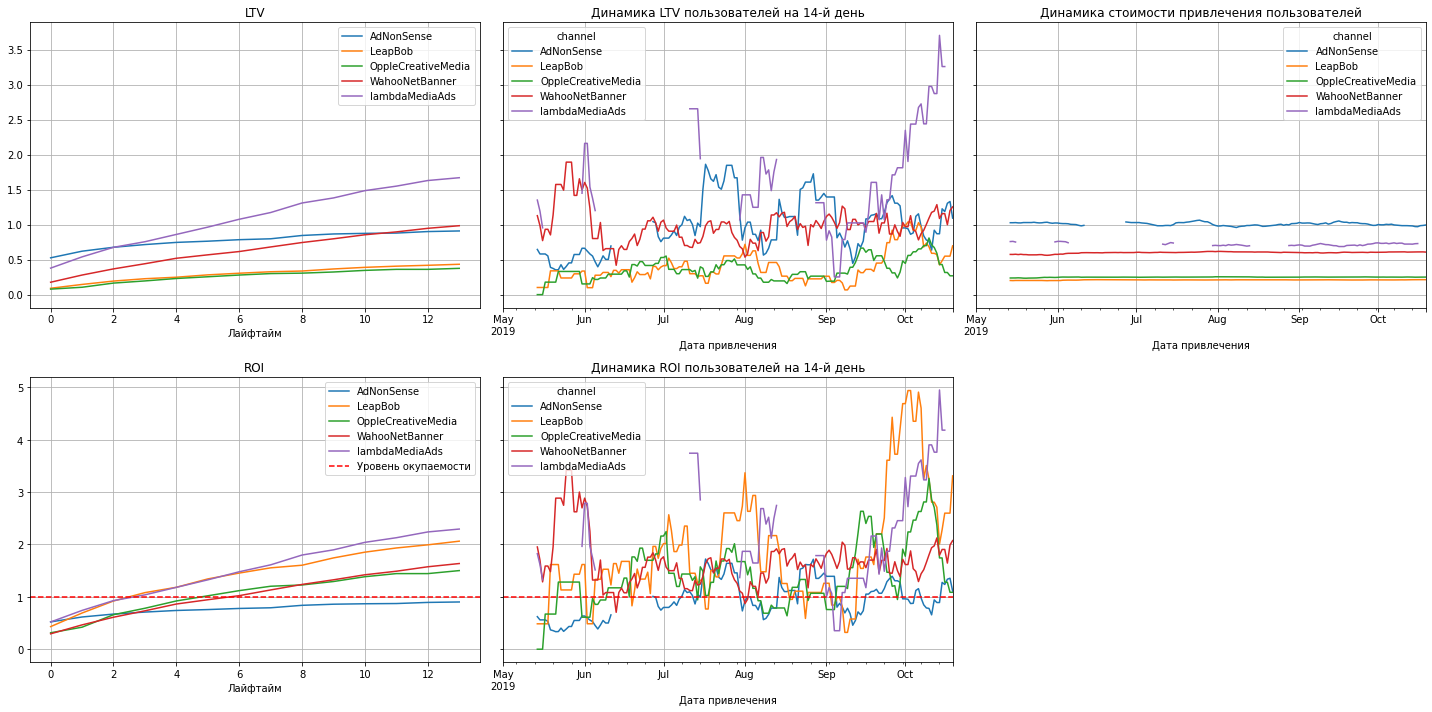

channel
AdNonSense            0.901917
OppleCreativeMedia    1.501000
WahooNetBanner        1.635973
LeapBob               2.062798
lambdaMediaAds        2.294159
Name: 13.0, dtype: float64

In [70]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad.query('region == "Germany"'), orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)
roi[13].sort_values()

В Германии работают 5 рекламных платформ, две из них LeapBob и lambdaMediaAds хорошо окупаются, еще две OppleCreativeMedia и WahooNetBanner окупаются немного хуже, и AdNonSense не окупается из-за высокой стоимости привлечения пользователей.

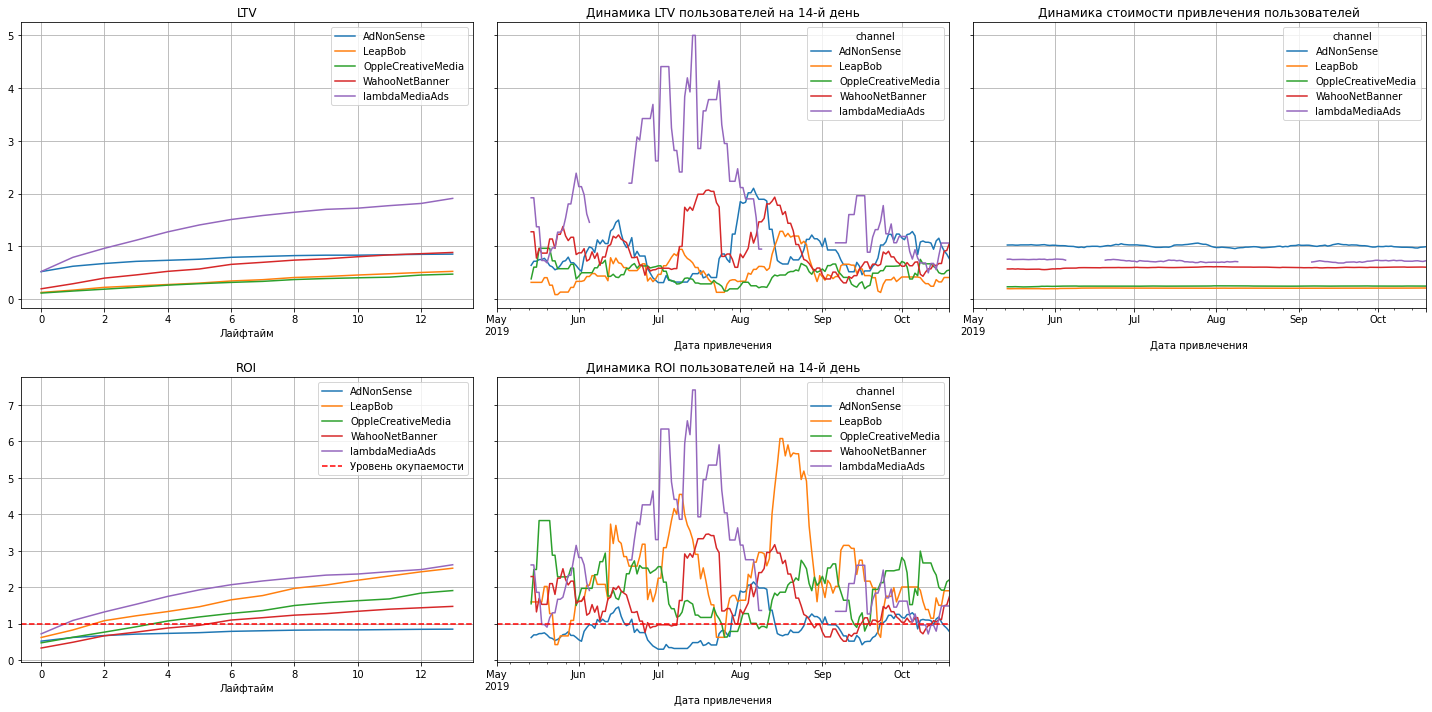

channel
AdNonSense            0.848420
WahooNetBanner        1.473141
OppleCreativeMedia    1.906716
LeapBob               2.520265
lambdaMediaAds        2.615083
Name: 13.0, dtype: float64

In [71]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_ad.query('region == "UK"'), orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)
roi[13].sort_values()

В Англии работают 5 рекламных платформ, две из них LeapBob и lambdaMediaAds хорошо окупаются, еще две OppleCreativeMedia и WahooNetBanner окупаются немного хуже, и AdNonSense не окупается из-за высокой стоимости привлечения пользователей.

Для стран Европы эффективные рекламные каналы одни и те же, это LeapBob и lambdaMediaAds. LeapBob привлекает пользователей с невысокой пожизненной ценность, но затраты на этот рекламный канал очень малы, поэтому он хорошо окупается. lambdaMediaAds стоит дороже, но и привлекает более "качественных" пользователей.  AdNonSense не окупился ни в одной из стран Европы, от него следует отказаться.

Для США хорошую окупаемость показали RocketSuperAds, MediaTornado и YRabbit. Пожизненная ценность пользователей из этих каналов ниже чем у пользователей из TipTop, но при этом сама реклама на этих каналах стоит гораздо меньше.

#### Окупается ли реклама, направленная на привлечение пользователей в целом?

В целом реклама перестала окупаться начиая с июня.

Показатель ROI к 14 дню лоходит до отметки 0,8, это значит, что к 14 дню возвращается только 80% стоимости рекламы.

#### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Негативное воздействие на окупаемость рекламы могут оказывать:
- Устройства:
    - mac и iphone, их ROI ниже всего, при том что доли платящих пользователей для этих устройств выше других
- Страны:
    - США, показатель ROI для этой страны самый низкий. Реклама в США перестала окупаться в конце мая, и с тех пор показатель ROI не превышает единицу и стабильно снижается из-за огромных затрат на рекламу в TipTop и высоких затрат на рекламу в FaceBoom. Усугубляет ситуацию, что доля платящих пользователей из США составляет 78% от общего числа платящих пользователей. 
- Рекламные каналы:
    - Каналы FaceBoom и TipTop (США). Несмотря на то, что эти два канала привлекают 60% платящих пользователей, их окупаемость находится на уровне 54% для TipTop и 74% для FaceBoom. 
    - Канал AdNonSense (ЕС)

#### Чем могут быть вызваны проблемы окупаемости?

Проблемы окупаемости рекламы могут быть вызваны:

- Высокой стоимостью привлечения пользователей mac и iphone
- Низкой конверсией пользователей РС
- Низким удержанием пользователей из США
- низким удержанием пользователей пришедших с каналов AdNonSense и FaceBoom
- Низкой пожизненной стоимостью пользователей из Германии, Англии и Франции
- Очень высокой стоимостью привлечения пользователей из США по каналу TipTop
- Высокой стоимостью привлечения пользователей из ЕС по каналу AdNonSense
- Низкой пожизненной стоимостью пользователей из каналов: OppleCreativeMedia, LeapBob, MediaTornado, YRabbit, AdNonSense, FaceBoom

#### Общий вывод

Пожизненная ценность клиента к концу второй недели составляет около 0,9\\$, LTV колеблется от 0,7\\$ до 1,1\\$ на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

При этом стоимость привлечения пользователей (САС) постоянно увеличивается с 0,7\\$ в мае до 1,3\\$ к концу октября.

Коэффициент рентабельности инвестиций меньше единицы, значит реклама не окупается, так же на графике динамики ROI наблидается падение с 1,4 в мае до 0,6 к концу октября, это говорит о снижении эффективности рекламной стратегии.

Конверсия к 14 лайфтайму составляет около 8%.

В середине мая, конце июня, конце июля и конце августа конверсия четырнадцатого дня снижается до 7%.

В середине июня конверсия 14-го дня достигла пика 9,5%.

в сентябре-октябре колебания конверсии стали менее заметны.

Удержание платящих пользователей к 14-му дню составляет окло 10%, для неплатящих этот параметр составляет 10% на 1-2 день, а к 14-му приближается к нулю.

Удержание платящих пользователей на 14-й день в середине мая было ниже всего и составляла окло 6%, также падения до 7,5% наблюдались в конце июня и конце июля.

Самое высокое значение удержания платяжих пользователей на 14-й день наблюдалось в конце мая - начале июня, так же значение удержания превысио 15% в середине августа.

Удержание неплатящих пользвателей стабильно держится на уровне примерно 1% на протяжении всего исследуемого периода.

Пожизненная ценность клиента к концу второй недели составляет около 0,9\\$ для пользователей android, mac и iphone, а для пользователей РС немного ниже, на уровне 0,85\\$, LTV колеблется от 0,6\\$ до 1\\$ для пользователей РС, пики LTV для пользователей android, mac и iphone колеблется от 0,7\\$ до 1,1\\$ на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

Стоимость привлечения пользователей (САС) ниже всего для пользователей РС, она постоянно увеличивается с 0,7\\$ в мае до 0,9\\$ к концу октября. Далее идут пользователи android (с 0,7\\$ в мае до 1\\$ к середине сентября, а далее произошло небольшое снижение к концу октября). Пользователи mac и iphone "стоят" дороже всего (с 0,8\\$ в мае до 1,5\\$ к концу октября).
 
Коэффициент рентабельности инвестиций для пользователей android, mac и iphone меньше единицы, значит реклама не окупается, а для пользователей РС после 11 лайфтайма становится немного ниже единицы и начинает окупаться.

Так же на графике динамики ROI для пользователей android, mac и iphone наблидается падение с 1,2 в мае до 0,6 к концу октября. У пользователей РС до сентября значения ROI почти всегда превышало 1, но в сентябре и октябре снизилось до 0,7, это говорит о снижении эффективности рекламной стратегии.

Пожизненная ценность клиента к концу второй недели составляет около 0,8\\$ для пользователей из Германии, Англии и Франции, а для пользователей из США немного выше, и доходит до 1\\$, LTV у Американцев выше других на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

Стоимость привлечения пользователей (САС) в июне снизилась для пользователей из Германии, Англии и Франции с 0,6\\$ до 0,4\\$, а для пользователей из США она постоянно повышалась до 1,8\\$.

Коэффициент рентабельности инвестиций для пользователей Германии, Англии и Франции превышает единицу начиная с 4-5 дня, а для Американцев доходит только до 0,7, значит реклама в США не окупается.

Так же на графике динамики ROI для пользователей из Германии, Англии и Франции ROI стабильно выше 1, а для пользователей из Англии в середине июля и августа доходит до 2,25 и 2,6 соответственно. У пользователей из США значения ROI с мая до конца октября упали с 1,2 до 0,5 это говорит о снижении эффективности рекламной стратегии для США.

LTV выше всего для пользователей lambdaMediaAds и TipTop и к концу втрой недели доходит до 1,5\\$ и 1,8\\$ соответственно.

Самые лучшие показатели LTV в динамике также у lambdaMediaAds и TipTop, причем lambdaMediaAds с начала сентября стабильно растет, а в начале июня LTV lambdaMediaAds достигал 3,2\\$.

Стоимость привлечения пользователей стабильна для всех каналов кроме TipTop, для него стоимость привлечения возрасла с 1\\$ до 3,5\\$.

Показатель ROI для большинства каналов превышает 1, реклама не окупается только для AdNonSense, FaceBoom и TipTop, самая лучшая окупаемость у lambdaMediaAds, MediaTornado и YRabbit.

Лучшее значение ROI показал канал YRabbit в середине июля, достигнув значения 7. Высокие показатели ROI дл YRabbit обусловлены в большей степени низкой стоимостью рекламы, чем высоким LTV.

Лучшие показатели конверсии у Mac, до 8 %. Худшие у PC, до 6,5 %.

В динамике конверсии 14-го заметен резкий провал у пользователей РС в конце июля до 5%, резкий скачок у пользователей andriod в 10-х числах сентября до 10,5% и резкий скачок у пользователей Mac в 20-х числах сентября до 10,5%.

Лучшие показатели конверсии у США, до 9,5%. Для остальных стран показатель примерно на одном уровне, около 5%.

В динамике конверсии 14-го для заметно снижение конверсии у Англии, Франции и Германии с 6% в мае до 5% в октябре, зато в США конверсия возрастала с 8% до 11% до середины июня, и сохраняется на уровне окло 9% на протяжении всего периода исследования.

Самая высокая конверсия у канала FaceBoom, к концу второй недели она достигает 12%, далее идут AdNonSense, lambdaMediaAds и TipTop, из конверсия 14-го дня примерно на уровне 10%.

Динамика конверсии пользователей на 14-й день наиболее нестабильна для lambdaMediaAds, в середине июня и августа она достигает 16%, а в начале сентября снижается до 5%.

Удержание платящих пользователей примерно одинаково для всех устройств и к 14 дню достигает 10% для iphohe, 12-13% для mac и android и 15% для PC.

Удержание неплатящих пользователей примерно одинаково для всех устройств и стремится к нулю.

В середине мая удержание платящих пользователей РС достигало 37%, так же неплохо себя показали РС и mac в конце мая и середине июля, тогда показатели удержания у обоих устройств достигали 25%.

Удержание платящих пользователей примерно одинаково для стран Европы и к 14 дню достигает 15-20%. Удержание для пользователей из США к 14 дню достигает лишь 10%

Удержание неплатящих пользователей примерно одинаково для всех стран и стремится к нулю.

Удержание платящих пользователей примерно одинаково для большинства каналов и к 14 дню достигает 20-25%. У MediaTomado и YRabbiit удержание 14 для достигает 10-12%. Хуже всего показывают себя AdNonSense и FaceBoom, их удержание близко к нулю.

Удержание неплатящих пользователей примерно одинаково для всех каналов и стремится к нулю.

В США работают 5 рекламных платформ, три из них RocketSuperAds, MediaTornado и YRabbit хорошо окупаются, но TipTop и FaceBoom не окупаются из-за высокой стоимости привлечения пользователей.

Во Франции, Германии и Англии работают 5 рекламных платформ, две из них LeapBob и lambdaMediaAds хорошо окупаются, еще две OppleCreativeMedia и WahooNetBanner окупаются немного хуже, и AdNonSense не окупается из-за высокой стоимости привлечения пользователей.

Для стран Европы эффективные рекламные каналы одни и те же, это LeapBob и lambdaMediaAds. LeapBob привлекает пользователей с невысокой пожизненной ценность, но затраты на этот рекламный канал очень малы, поэтому он хорошо окупается. lambdaMediaAds стоит дороже, но и привлекает более "качественных" пользователей.  AdNonSense не окупился ни в одной из стран Европы, от него следует отказаться.

Для США хорошую окупаемость показали RocketSuperAds, MediaTornado и YRabbit. Пожизненная ценность пользователей из этих каналов ниже чем у пользователей из TipTop, но при этом сама реклама на этих каналах стоит гораздо меньше.

В целом реклама перестала окупаться начиая с июня.

Показатель ROI к 14 дню лоходит до отметки 0,8, это значит, что к 14 дню возвращается только 80% стоимости рекламы.

Негативное воздействие на окупаемость рекламы могут оказывать:
- Устройства:
    - mac и iphone, их ROI ниже всего, при том что доли платящих пользователей для этих устройств выше других
- Страны:
    - США, показатель ROI для этой страны самый низкий. Реклама в США перестала окупаться в конце мая, и с тех пор показатель ROI не превышает единицу и стабильно снижается из-за огромных затрат на рекламу в TipTop и высоких затрат на рекламу в FaceBoom. Усугубляет ситуацию, что доля платящих пользователей из США составляет 78% от общего числа платящих пользователей. 
- Рекламные каналы:
    - Каналы FaceBoom и TipTop (США). Несмотря на то, что эти два канала привлекают 60% платящих пользователей, их окупаемость находится на уровне 54% для TipTop и 74% для FaceBoom 
    - Канал AdNonSense (ЕС)
    
Проблемы окупаемости рекламы могут быть вызваны:

- Высокой стоимостью привлечения пользователей mac и iphone
- Низкой конверсией пользователей РС
- Низким удержанием пользователей из США
- низким удержанием пользователей пришедших с каналов AdNonSense и FaceBoom
- Низкой пожизненной стоимостью пользователей из Германии, Англии и Франции
- Очень высокой стоимостью привлечения пользователей из США по каналу TipTop
- Высокой стоимостью привлечения пользователей из ЕС по каналу AdNonSense
- Низкой пожизненной стоимостью пользователей из каналов: OppleCreativeMedia, LeapBob, MediaTornado, YRabbit, AdNonSense, FaceBoom

### Напишите выводы <a id="shag6"></a>  
[К содержанию](#soder)

В таблице visits содержится информация о посещениях сайта. Таблица состоит из 6 столбцов и 309901 строк.

Структура visits:

User Id — уникальный идентификатор пользователя (целочисленный тип данных),

Region — страна пользователя (объектный тип данных),

Device — тип устройства пользователя (объектный тип данных),

Channel — идентификатор источника перехода (объектный тип данных),

Session Start — дата и время начала сессии (объектный тип данных),

Session End — дата и время окончания сессии (объектный тип данных).

Названия столбцов приведены к нижнему регистру.

Столбцы с датой и временем начала и окончания сессии приведены к типу datetime.

Пропусков, явных и неявных дубликатов не обнаружено.

В таблице orders содержится информация о заказах. Таблица состоит из 3 столбцов и 340212 строк.

Структура orders:

User Id — уникальный идентификатор пользователя (целочисленный тип данных),

Event Dt — дата и время покупки (объектный тип данных),

Revenue — сумма заказа (вещественный тип данных).

Названия столбцов приведены к нижнему регистру.

Столбец с датой и временем покупки приведены к типу datetime.

Пропусков и явных дубликатов не обнаружено.

В таблице costs содержится информация о расходах на рекламу. Таблица состоит из 3 столбцов и 1800 строк.

Структура costs: dt — дата проведения рекламной кампании (объектный тип данных),

Channel — идентификатор рекламного источника (объектный тип данных),

costs — расходы на эту кампанию (вещественный тип данных).

Названия столбцов приведены к нижнему регистру.

Столбец с датой проведения рекламной кампании приведены к типу datetime.

Пропусков, явных и неявных дубликатов не обнаружено.

Заданы функции для вычисления значений метрик:

- get_profiles() — для создания профилей пользователей
- get_retention() — для подсчёта Retention Rate
- get_conversion() — для подсчёта конверсии
- get_ltv() — для подсчёта LTV

А также функции для построения графиков:

- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

В таблице profiles содержится информация о 150 008 профилей пользователей, с датами первого посещения сайта, страной, каналом и устройством входа, в последных столбцах выведен месяц первого вхада и информация о том, покупал ли пользователь что-либо в течение исследуемого периода.

Минимальная дата привлечения пользователей: 2019-05-01.

Максимальная дата привлечения пользователей: 2019-10-27.

Они соответствуют границе исследуемого периода.

Больше всего зарегистрированных пользователей приходится на США, далее Франция, Англия и Германия.

Процент платящих пользователей больше всего также в США.

Отношение платящих пользователей к их общему количеству больше всего в США, далее Германия, Англия и Франция.

Пользователей из Германии меньше всего, но при этом их "качество" выше чем у пользователей из Франции и Англии.

Больше всего зарегистрированных пользователей заходят с Айфонов, далее Андроид, ПК и Мак.

Процент платящих пользователей больше всего также на Айфонах.

Отношение платящих пользователей к их общему количеству больше всего на Мак, далее Айфон, Андроид и ПК.

Пользователей Мак меньше всего, но при этом их "качество" выше чем у всех остальных пользователей.

Больше всего зарегистрированных пользователей (кроме тех кто приходят сами) приходят из FaceBoom их около 19%, далее идет TipTop (13%) и другие.

Процент платящих пользователей больше всего от каналов FaceBoom и TipTop.

Отношение платящих пользователей к их общему количеству больше всего на FaceBoom, далее AdNonSense, lambdaMediaAds и TipTop.

Пользователей AdNonSense и lambdaMediaAds меньше всего, но при этом их "качество" выше чем у всех остальных пользователей (кроме FaceBoom).

Всего за исследуемый период на рекламу было потрачено 105497,3$.

Больше всего потратили на рекламу в TipTop и FaceBoom.

Меньше всего на YRabbit, MediaTornado и lambdaMediaAds.

Расходы на рекламу в TipTop и FaceBoom постоянно растут, пики о обоих пришлись на 39 неделю года.

Расходы на остальные каналы привлечения пользователей примерно одинаковы, по ним не надлюдается значительных колебаний.

Расходы на рекламу в TipTop и FaceBoom постоянно растут, пик стоимости рекламы в TipTop пришелся на сентябрь.

Расходы на остальные каналы привлечения пользователей примерно одинаковы, по ним не наблюдается значительных колебаний.

В среднем самым дорогим источником привлечения пользователей является TipTop, средняя стоимость привлечения пользователей около 2,8$.

Стоимость привлечения постоянно растет, начиная с 1$ в мае до 3,5$ в сентябре-октябре. График динамики САС внешне напоминает лестницу, примерно в середине мая, двадцатых числах июня, конце июля и начале сентября наблюдаются резкие скачки стоимости привлечения пользователей, этому может быть два объяснения: в эти даты проводили рекламные кампании, или по каким-то причинам снижалось количество привлеченных клиентов.

Проверим это далее.

Привлечение клиентов через FaceBoom и AdNonSense обходится примерно в 1$, эти графики выглядят более стабильными.

Снижения количества привлеченных пользователей не наблюдается, скачки стоимости привлечения пользователей из TipTop обусловлены проведением ежемесячных рекламных кампаний.

Пожизненная ценность клиента к концу второй недели составляет около 0,9\\$, LTV колеблется от 0,7\\$ до 1,1\\$ на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

При этом стоимость привлечения пользователей (САС) постоянно увеличивается с 0,7\\$ в мае до 1,3\\$ к концу октября.

Коэффициент рентабельности инвестиций меньше единицы, значит реклама не окупается, так же на графике динамики ROI наблидается падение с 1,4 в мае до 0,6 к концу октября, это говорит о снижении эффективности рекламной стратегии.

Конверсия к 14 лайфтайму составляет около 8%.

В середине мая, конце июня, конце июля и конце августа конверсия четырнадцатого дня снижается до 7%.

В середине июня конверсия 14-го дня достигла пика 9,5%.

в сентябре-октябре колебания конверсии стали менее заметны.

Удержание платящих пользователей к 14-му дню составляет окло 10%, для неплатящих этот параметр составляет 10% на 1-2 день, а к 14-му приближается к нулю.

Удержание платящих пользователей на 14-й день в середине мая было ниже всего и составляла окло 6%, также падения до 7,5% наблюдались в конце июня и конце июля.

Самое высокое значение удержания платяжих пользователей на 14-й день наблюдалось в конце мая - начале июня, так же значение удержания превысио 15% в середине августа.

Удержание неплатящих пользвателей стабильно держится на уровне примерно 1% на протяжении всего исследуемого периода.

Пожизненная ценность клиента к концу второй недели составляет около 0,9\\$ для пользователей android, mac и iphone, а для пользователей РС немного ниже, на уровне 0,85\\$, LTV колеблется от 0,6\\$ до 1\\$ для пользователей РС, пики LTV для пользователей android, mac и iphone колеблется от 0,7\\$ до 1,1\\$ на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

Стоимость привлечения пользователей (САС) ниже всего для пользователей РС, она постоянно увеличивается с 0,7\\$ в мае до 0,9\\$ к концу октября. Далее идут пользователи android (с 0,7\\$ в мае до 1\\$ к середине сентября, а далее произошло небольшое снижение к концу октября). Пользователи mac и iphone "стоят" дороже всего (с 0,8\\$ в мае до 1,5\\$ к концу октября).
 
Коэффициент рентабельности инвестиций для пользователей android, mac и iphone меньше единицы, значит реклама не окупается, а для пользователей РС после 11 лайфтайма становится немного ниже единицы и начинает окупаться.

Так же на графике динамики ROI для пользователей android, mac и iphone наблидается падение с 1,2 в мае до 0,6 к концу октября. У пользователей РС до сентября значения ROI почти всегда превышало 1, но в сентябре и октябре снизилось до 0,7, это говорит о снижении эффективности рекламной стратегии.

Пожизненная ценность клиента к концу второй недели составляет около 0,8\\$ для пользователей из Германии, Англии и Франции, а для пользователей из США немного выше, и доходит до 1\\$, LTV у Американцев выше других на протяжении всего периода исследования, не наблюдается тенденции к понижению или повышению LTV за период.

Стоимость привлечения пользователей (САС) в июне снизилась для пользователей из Германии, Англии и Франции с 0,6\\$ до 0,4\\$, а для пользователей из США она постоянно повышалась до 1,8\\$.

Коэффициент рентабельности инвестиций для пользователей Германии, Англии и Франции превышает единицу начиная с 4-5 дня, а для Американцев доходит только до 0,7, значит реклама в США не окупается.

Так же на графике динамики ROI для пользователей из Германии, Англии и Франции ROI стабильно выше 1, а для пользователей из Англии в середине июля и августа доходит до 2,25 и 2,6 соответственно. У пользователей из США значения ROI с мая до конца октября упали с 1,2 до 0,5 это говорит о снижении эффективности рекламной стратегии для США.

LTV выше всего для пользователей lambdaMediaAds и TipTop и к концу втрой недели доходит до 1,5\\$ и 1,8\\$ соответственно.

Самые лучшие показатели LTV в динамике также у lambdaMediaAds и TipTop, причем lambdaMediaAds с начала сентября стабильно растет, а в начале июня LTV lambdaMediaAds достигал 3,2\\$.

Стоимость привлечения пользователей стабильна для всех каналов кроме TipTop, для него стоимость привлечения возрасла с 1\\$ до 3,5\\$.

Показатель ROI для большинства каналов превышает 1, реклама не окупается только для AdNonSense, FaceBoom и TipTop, самая лучшая окупаемость у lambdaMediaAds, MediaTornado и YRabbit.

Лучшее значение ROI показал канал YRabbit в середине июля, достигнув значения 7. Высокие показатели ROI дл YRabbit обусловлены в большей степени низкой стоимостью рекламы, чем высоким LTV.

Лучшие показатели конверсии у Mac, до 8 %. Худшие у PC, до 6,5 %.

В динамике конверсии 14-го заметен резкий провал у пользователей РС в конце июля до 5%, резкий скачок у пользователей andriod в 10-х числах сентября до 10,5% и резкий скачок у пользователей Mac в 20-х числах сентября до 10,5%.

Лучшие показатели конверсии у США, до 9,5%. Для остальных стран показатель примерно на одном уровне, около 5%.

В динамике конверсии 14-го для заметно снижение конверсии у Англии, Франции и Германии с 6% в мае до 5% в октябре, зато в США конверсия возрастала с 8% до 11% до середины июня, и сохраняется на уровне окло 9% на протяжении всего периода исследования.

Самая высокая конверсия у канала FaceBoom, к концу второй недели она достигает 12%, далее идут AdNonSense, lambdaMediaAds и TipTop, из конверсия 14-го дня примерно на уровне 10%.

Динамика конверсии пользователей на 14-й день наиболее нестабильна для lambdaMediaAds, в середине июня и августа она достигает 16%, а в начале сентября снижается до 5%.

Удержание платящих пользователей примерно одинаково для всех устройств и к 14 дню достигает 10% для iphohe, 12-13% для mac и android и 15% для PC.

Удержание неплатящих пользователей примерно одинаково для всех устройств и стремится к нулю.

В середине мая удержание платящих пользователей РС достигало 37%, так же неплохо себя показали РС и mac в конце мая и середине июля, тогда показатели удержания у обоих устройств достигали 25%.

Удержание платящих пользователей примерно одинаково для стран Европы и к 14 дню достигает 15-20%. Удержание для пользователей из США к 14 дню достигает лишь 10%

Удержание неплатящих пользователей примерно одинаково для всех стран и стремится к нулю.

Удержание платящих пользователей примерно одинаково для большинства каналов и к 14 дню достигает 20-25%. У MediaTomado и YRabbiit удержание 14 для достигает 10-12%. Хуже всего показывают себя AdNonSense и FaceBoom, их удержание близко к нулю.

Удержание неплатящих пользователей примерно одинаково для всех каналов и стремится к нулю.

В США работают 5 рекламных платформ, три из них RocketSuperAds, MediaTornado и YRabbit хорошо окупаются, но TipTop и FaceBoom не окупаются из-за высокой стоимости привлечения пользователей.

Во Франции, Германии и Англии работают 5 рекламных платформ, две из них LeapBob и lambdaMediaAds хорошо окупаются, еще две OppleCreativeMedia и WahooNetBanner окупаются немного хуже, и AdNonSense не окупается из-за высокой стоимости привлечения пользователей.

Для стран Европы эффективные рекламные каналы одни и те же, это LeapBob и lambdaMediaAds. LeapBob привлекает пользователей с невысокой пожизненной ценность, но затраты на этот рекламный канал очень малы, поэтому он хорошо окупается. lambdaMediaAds стоит дороже, но и привлекает более "качественных" пользователей.  AdNonSense не окупился ни в одной из стран Европы, от него следует отказаться.

Для США хорошую окупаемость показали RocketSuperAds, MediaTornado и YRabbit. Пожизненная ценность пользователей из этих каналов ниже чем у пользователей из TipTop, но при этом сама реклама на этих каналах стоит гораздо меньше.

В целом реклама перестала окупаться начиая с июня.

Показатель ROI к 14 дню лоходит до отметки 0,8, это значит, что к 14 дню возвращается только 80% стоимости рекламы.

Негативное воздействие на окупаемость рекламы могут оказывать:
- Устройства:
    - mac и iphone, их ROI ниже всего, при том что доли платящих пользователей для этих устройств выше других
- Страны:
    - США, показатель ROI для этой страны самый низкий. Реклама в США перестала окупаться в конце мая, и с тех пор показатель ROI не превышает единицу и стабильно снижается из-за огромных затрат на рекламу в TipTop и высоких затрат на рекламу в FaceBoom. Усугубляет ситуацию, что доля платящих пользователей из США составляет 78% от общего числа платящих пользователей. 
- Рекламные каналы:
    - Каналы FaceBoom и TipTop (США). Несмотря на то, что эти два канала привлекают 60% платящих пользователей, их окупаемость находится на уровне 54% для TipTop и 74% для FaceBoom 
    - Канал AdNonSense (ЕС)
    
Проблемы окупаемости рекламы могут быть вызваны:

- Высокой стоимостью привлечения пользователей mac и iphone
- Низкой конверсией пользователей РС
- Низким удержанием пользователей из США
- низким удержанием пользователей пришедших с каналов AdNonSense и FaceBoom
- Низкой пожизненной стоимостью пользователей из Германии, Англии и Франции
- Очень высокой стоимостью привлечения пользователей из США по каналу TipTop
- Высокой стоимостью привлечения пользователей из ЕС по каналу AdNonSense
- Низкой пожизненной стоимостью пользователей из каналов: OppleCreativeMedia, LeapBob, MediaTornado, YRabbit, AdNonSense, FaceBoom


На основании проведенного анализа, можно составить следующие рекомендации для отдела маркетинга:
- Пересмотреть эффективность каналов привлечения пользователей из разных стран.
    - снизить затраты на рекламу в TipTop и FaceBoom в США, развивать рекламу в США стоит на каналах RocketSuperAds, MediaTornado и YRabbit
    - снизить затраты на рекламу в AdNonSense в ЕС, 
- Обратить внимание на конверсию пользователей РС
Возможно пользователи РС сталкиваются с техническими проблемами
- Пересмотреть эффективность рекламы для пользователей mac и iphone
Стоимость их привлечения как и доли платящих пользователей для этих устройств выше других. Однако пожизенная ценность этих пользователей не отличается от остальных
- Обратить внимание на "качество" целевой аудитории
Доля пользователей из США  составляет 78%, при этом у них самый низкий показатель ROI. Это связано с огромными затратами на рекламу в США, которые не окупаются. При этом затраты на рекламу в остальных странах окупаются уже через неделю. Необходимо сниизть затраты на рекламу в США и привлечь больше пользователей из других стран, при этом повысив их конверсию.
- Повысить конверсию органических пользователей
При доле органич